In [431]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p

import sklearn as sklearn

from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
import sklearn.feature_selection as fs
from sklearn import tree

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA as pca
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

from sklearn import svm
from sklearn import metrics
import xgboost as xgboost
from xgboost import XGBRegressor

from mlxtend.regressor import StackingCVRegressor

In [6]:
test_df = pd.read_csv("test.csv")

In [7]:
test_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         160       RM         21.0     1680   Pave   NaN      Reg   
12    1473         160       RM         21.0     1680   Pave   NaN      Reg   
13    1474         160       RL         24.0     2280   Pave   NaN      Reg   
14    1475         120       RL         24.0     2280   Pave   NaN      Reg   
15    1476          60       RL        102.0    12858   Pave   NaN      IR1   
16    1477          20       RL         94.0    12883   Pave   NaN      IR1   
17    1478          20       RL         90.0    11520   Pave   NaN      Reg   
18    1479          20       RL         79.0    14122   Pave   NaN      IR1   
19    1480          20       RL        110.0    14300   Pave   NaN      Reg   
20    1481          60       RL        105.0    13650   Pave   NaN      Reg   
21    1482         120       RL         41.0     7132   Pave   NaN      IR1   
22    1483          20       RL        100.0    18494   Pave   NaN      IR1   
23    1484         120       RL         43.0     3203   Pave   NaN      Reg   
24    1485          80       RL         67.0    13300   Pave   NaN      IR1   
25    1486          60       RL         63.0     8577   Pave   NaN      IR1   
26    1487          60       RL         60.0    17433   Pave   NaN      IR2   
27    1488          20       RL         73.0     8987   Pave   NaN      Reg   
28    1489          20       FV         92.0     9215   Pave   NaN      Reg   
29    1490          20       FV         84.0    10440   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1429  2890          30       RM         50.0     7030   Pave   NaN      Reg   
1430  2891          50       RM         75.0     9060   Pave   NaN      Reg   
1431  2892          30  C (all)         69.0    12366   Pave   NaN      Reg   
1432  2893         190  C (all)         50.0     9000   Pave   NaN      Reg   
1433  2894          50  C (all)         60.0     8520   Grvl   NaN      Reg   
1434  2895         120       RM         41.0     5748   Pave   NaN      IR1   
1435  2896         120       RM         44.0     3842   Pave   NaN      IR1   
1436  2897          20       RL         69.0    23580   Pave   NaN      IR1   
1437  2898          90       RL         65.0     8385   Pave   NaN      Reg   
1438  2899          20       RL         70.0     9116   Pave   NaN      Reg   
1439  2900          80       RL        140.0    11080   Pave   NaN      Reg   
1440  2901          20       RL          NaN    50102   Pave   NaN      IR1   
1441  2902          20       RL          NaN     8098   Pave   NaN      IR1   
1442  2903          20       RL         95.0    13618   Pave   NaN      Reg   
1443  2904          20       RL         88.0    11577   Pave   NaN      Reg   
1444  2905          20      NaN        125.0    31250   Pave   NaN      Reg   
1445  2906          90       RM         78.0     7020   Pave   NaN      Reg   
1446  2907         160       RM         41.0     2665   Pave   NaN      Reg   
1447  2908          20       RL         58.0    10172   Pa

In [8]:
train = pd.read_csv("train.csv")

In [9]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1430  1431          60       RL         60.0    21930   Pave   NaN      IR3   
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
1432  1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1433  1434          60       RL         93.0    10261   Pave   NaN      IR1   
1434  1435          20       RL         80.0    17400   Pave   NaN      Reg   
1435  1436          20       RL         80.0     8400   Pave   NaN      Reg   
1436  1437          20       RL         60.0     9000   Pave   NaN      Reg   
1437  1438          20       RL         96.0    12444   Pave   NaN      Reg   
1438  1439          20       RM         90.0     7407   Pave   NaN      Reg   
1439  1440          60       RL         80.0    11584   Pave   NaN      Reg   
1440  1441          70       RL         79.0    11526   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1444  1445          20       RL         63.0     8500   Pave   NaN      Reg   
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pa

In [ ]:
# train_columns = pd.DataFrame(train.columns)
# train_columns.columns = ['Names']
# train_columns

In [14]:
train_test_df = test_df.append(train, sort=False)

In [16]:
train_test_df.drop(columns=['SalePrice'], inplace=True)

In [17]:
train_test_df.shape

(2919, 80)

In [18]:
pd.set_option('display.max_columns', 500)

In [19]:
train_test_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         160       RM         21.0     1680   Pave   NaN      Reg   
12    1473         160       RM         21.0     1680   Pave   NaN      Reg   
13    1474         160       RL         24.0     2280   Pave   NaN      Reg   
14    1475         120       RL         24.0     2280   Pave   NaN      Reg   
15    1476          60       RL        102.0    12858   Pave   NaN      IR1   
16    1477          20       RL         94.0    12883   Pave   NaN      IR1   
17    1478          20       RL         90.0    11520   Pave   NaN      Reg   
18    1479          20       RL         79.0    14122   Pave   NaN      IR1   
19    1480          20       RL        110.0    14300   Pave   NaN      Reg   
20    1481          60       RL        105.0    13650   Pave   NaN      Reg   
21    1482         120       RL         41.0     7132   Pave   NaN      IR1   
22    1483          20       RL        100.0    18494   Pave   NaN      IR1   
23    1484         120       RL         43.0     3203   Pave   NaN      Reg   
24    1485          80       RL         67.0    13300   Pave   NaN      IR1   
25    1486          60       RL         63.0     8577   Pave   NaN      IR1   
26    1487          60       RL         60.0    17433   Pave   NaN      IR2   
27    1488          20       RL         73.0     8987   Pave   NaN      Reg   
28    1489          20       FV         92.0     9215   Pave   NaN      Reg   
29    1490          20       FV         84.0    10440   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1430  1431          60       RL         60.0    21930   Pave   NaN      IR3   
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
1432  1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1433  1434          60       RL         93.0    10261   Pave   NaN      IR1   
1434  1435          20       RL         80.0    17400   Pave   NaN      Reg   
1435  1436          20       RL         80.0     8400   Pave   NaN      Reg   
1436  1437          20       RL         60.0     9000   Pave   NaN      Reg   
1437  1438          20       RL         96.0    12444   Pave   NaN      Reg   
1438  1439          20       RM         90.0     7407   Pave   NaN      Reg   
1439  1440          60       RL         80.0    11584   Pave   NaN      Reg   
1440  1441          70       RL         79.0    11526   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1444  1445          20       RL         63.0     8500   Pave   NaN      Reg   
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pa

## Exploratory Data Analysis

In [20]:
#counter counts no of occurences of a value in a column here
from collections import Counter
Counter(train.MSSubClass)

Counter({60: 299,
         20: 536,
         70: 60,
         50: 144,
         190: 30,
         45: 12,
         90: 52,
         120: 87,
         30: 69,
         85: 20,
         80: 58,
         160: 63,
         75: 16,
         180: 10,
         40: 4})

In [23]:
train_test_df_nas = np.sum(train_test_df.isna())
train_test_df_nas[train_test_df_nas>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [24]:
train_test_df.nunique()

Id               2919
MSSubClass         16
MSZoning            5
LotFrontage       128
LotArea          1951
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         118
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        444
ExterQual           4
ExterCond           5
Foundation          6
                 ... 
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       14
Functional          7
Fireplaces          5
FireplaceQu         5
GarageType          6
GarageYrBlt       103
GarageFinish        3
GarageCars          6
GarageArea        603
GarageQual          5
GarageCond

In [26]:
train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
                 ... 
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
FireplaceQu         5
GarageType          6
GarageYrBlt        97
GarageFinish        3
GarageCars          5
GarageArea        441
GarageQual          5
GarageCond          5
PavedDrive

In [27]:
train.shape

(1460, 81)

In [28]:
data_summary=train.describe()

In [29]:
data_summary.to_csv('train_data_summary.csv')

In [ ]:
n = 0
plt.figure(figsize=(15,8))
plt.scatter(train.iloc[:,n],train['SalePrice'])
plt.xlabel(train.columns[n])
plt.ylabel('SalePrice')

#SalesPrice_mean = [np.mean(train['SalePrice'])]*len(train.columns[n])

#mean_line = ax.plot(train.columns[n],SalesPrice_mean, label='Mean', linestyle='--')


In [ ]:
np.histogram(train['SalePrice'])

In [ ]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(15, 7)) #setting size of plot
n, bins, patches = plt.hist(train['SalePrice'], facecolor='blue', alpha=0.5) #matplotlib histogram
plt.title("Sale Price Histogram")
#color coding by height
fracs = n / n.max() 
#normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())
#loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

In [ ]:
fig, ax = plt.subplots(figsize=(18, 7))
train.isnull().sum().nlargest(80).plot(kind='bar')
plt.title("Null Values Count")

In [ ]:
fig, ax = plt.subplots(figsize=(18, 7))
train_test_df.isnull().sum().nlargest(80).plot(kind='bar')
plt.title("Null Values Count")

In [30]:
train_test_df_NAs = pd.DataFrame((train_test_df.loc[:, train_test_df.isna().any()]).columns.values)

In [31]:
train_test_df_NAs.to_csv('train_test_df_NAs.csv')

In [32]:
list((train.loc[:, train.isna().any()]).columns.values)

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
#labels,levels = pd.factorize(train.Alley)
#labels.nunique()

In [ ]:
def boxplot_sorted(df, by, column, rot=0):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes")
plt.figure(figsize=(15,7))
plt.scatter(train['Neighborhood'],train['SalePrice'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')

In [ ]:
#creating pandas boxplot and usinfg function to sort values
def boxplot_sorted(df, by, column, rot=90):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes", figsize = (17,5))
axes = boxplot_sorted(train, by=["Neighborhood"], column="SalePrice")

#train.boxplot(column = 'SalePrice', by ='Neighborhood', figsize = (17,8), rot = 90) #pandas boxplot unsorted

In [ ]:
MSSubClass_grp = train.groupby(['MSSubClass']).agg(['median'])['SalePrice'].sort_values('median',ascending=False) #sorting zones based on prices for boxplot

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
plt.xticks(rotation=75)
sns.set(font_scale =1.5)

sns.boxplot(x='MSSubClass', y='SalePrice', data=train,width = 0.8, palette=sns.color_palette("Set2", 12), order=MSSubClass_grp.index)
sns.swarmplot(x='MSSubClass', y='SalePrice', data=train, order=MSSubClass_grp.index)

In [ ]:
Zoning = train.groupby(['MSZoning']).agg(['median'])['SalePrice'].sort_values('median',ascending=False) #sorting zones based on prices for boxplot

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
plt.xticks(rotation=75)
sns.set(font_scale =1.5)

sns.boxplot(x='MSZoning', y='SalePrice', data=train,width = 0.8, palette=sns.color_palette("Set2", 12), order=Zoning.index)
sns.swarmplot(x='MSZoning', y='SalePrice', data=train, order=Zoning.index)

In [ ]:
#Street_type = train.groupby(['Street']).agg(['median'])['SalePrice'].sort_values('median',ascending=False) #sorting street type based on prices for boxplot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
plt.xticks(rotation=75)
sns.set(font_scale =1.5)

sns.boxplot(x='Street', y='SalePrice', data=train,width = 0.8, palette=sns.color_palette("Set2", 12))
sns.swarmplot(x='Street', y='SalePrice', data=train)

In [33]:
train['MSZoning'].nunique()

5

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(train['LotArea'],train['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

In [ ]:
#plotting iwth missing values as is
plt.figure(figsize=(15,8))
plt.scatter(train['LotFrontage'],train['SalePrice'])
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')

In [ ]:
#plotting iwth missing values as is
plt.figure(figsize=(15,8))
plt.scatter(train['MasVnrArea'],train['SalePrice'])
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')

In [ ]:
#plotting iwth missing values as is
plt.figure(figsize=(15,8))
plt.scatter(train['TotalBsmtSF'],train['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(train['1stFlrSF'],train['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(train['2ndFlrSF'],train['SalePrice'])
plt.xlabel('2ndFlrSF')
plt.ylabel('SalePrice')

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(train['GarageArea'],train['SalePrice'])
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

## EDA & Data Preprocessing

In [34]:
train_test_df.Alley = train_test_df.Alley.fillna("NoAlley")

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
plt.xticks(rotation=75)
sns.set(font_scale =1.5)

sns.boxplot(x='Alley', y='SalePrice', data=train,width = 0.8, palette=sns.color_palette("Set2", 12))
sns.swarmplot(x='Alley', y='SalePrice', data=train)

In [ ]:
sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='LotShape', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12))
sns.swarmplot(x='LotShape', y='SalePrice', data=train)

In [ ]:
sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='LandContour', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12))
sns.swarmplot(x='LandContour', y='SalePrice', data=train)

In [ ]:
sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Utilities', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12))
sns.swarmplot(x='Utilities', y='SalePrice', data=train)

In [ ]:
sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='LotConfig', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12))
sns.swarmplot(x='LotConfig', y='SalePrice', data=train)

In [ ]:
sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='LandSlope', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12))
sns.swarmplot(x='LandSlope', y='SalePrice', data=train)

In [ ]:
condition1_grp = train.groupby(['Condition1']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Condition1', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12),order=condition1_grp.index)
sns.swarmplot(x='Condition1', y='SalePrice', data=train,order=condition1_grp.index)

In [ ]:
condition2_grp = train.groupby(['Condition2']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Condition2', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12),order=condition2_grp.index)
sns.swarmplot(x='Condition2', y='SalePrice', data=train,order=condition2_grp.index)

In [ ]:
BldgType_grp = train.groupby(['BldgType']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='BldgType', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12),order=BldgType_grp.index)
sns.swarmplot(x='BldgType', y='SalePrice', data=train, order=BldgType_grp.index)

In [ ]:
HouseStyle_grp = train.groupby(['HouseStyle']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='HouseStyle', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12),order=HouseStyle_grp.index)
sns.swarmplot(x='HouseStyle', y='SalePrice', data=train, order=HouseStyle_grp.index)

In [ ]:
OverallQual_grp = train.groupby(['OverallQual']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='OverallQual', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12),order=OverallQual_grp.index)
sns.swarmplot(x='OverallQual', y='SalePrice', data=train, order=OverallQual_grp.index)

In [ ]:
OverallCond_grp = train.groupby(['OverallCond']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='OverallCond', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12),order=OverallCond_grp.index)
sns.swarmplot(x='OverallCond', y='SalePrice', data=train, order=OverallCond_grp.index)

In [ ]:
sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(45,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='YearBuilt', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12))
sns.swarmplot(x='YearBuilt', y='SalePrice', data=train)

In [ ]:
RoofStyle_grp = train.groupby(['RoofStyle']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='RoofStyle', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = RoofStyle_grp.index)
sns.swarmplot(x='RoofStyle', y='SalePrice', data=train, order = RoofStyle_grp.index)

In [ ]:
RoofMatl_grp = train.groupby(['RoofMatl']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='RoofMatl', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = RoofMatl_grp.index)
sns.swarmplot(x='RoofMatl', y='SalePrice', data=train, order = RoofMatl_grp.index)

In [ ]:
Exterior1st_grp = train.groupby(['Exterior1st']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Exterior1st', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Exterior1st_grp.index)
sns.swarmplot(x='Exterior1st', y='SalePrice', data=train, order = Exterior1st_grp.index)

In [ ]:
ExterQual_grp = train.groupby(['ExterQual']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='ExterQual', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = ExterQual_grp.index)
sns.swarmplot(x='ExterQual', y='SalePrice', data=train, order = ExterQual_grp.index)

In [ ]:
ExterCond_grp = train.groupby(['ExterCond']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='ExterCond', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = ExterCond_grp.index)
sns.swarmplot(x='ExterCond', y='SalePrice', data=train, order = ExterCond_grp.index)

In [ ]:
Foundation_grp = train.groupby(['Foundation']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Foundation', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Foundation_grp.index)
sns.swarmplot(x='Foundation', y='SalePrice', data=train, order = Foundation_grp.index)

In [ ]:
Heating_grp = train.groupby(['Heating']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Heating', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Heating_grp.index)
sns.swarmplot(x='Heating', y='SalePrice', data=train, order = Heating_grp.index)

In [ ]:
HeatingQC_grp = train.groupby(['HeatingQC']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='HeatingQC', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = HeatingQC_grp.index)
sns.swarmplot(x='HeatingQC', y='SalePrice', data=train, order = HeatingQC_grp.index)

In [ ]:
CentralAir_grp = train.groupby(['CentralAir']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='CentralAir', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = CentralAir_grp.index)
sns.swarmplot(x='CentralAir', y='SalePrice', data=train, order = CentralAir_grp.index)

In [ ]:
Electrical_grp = train.groupby(['Electrical']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Electrical', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Electrical_grp.index)
sns.swarmplot(x='Electrical', y='SalePrice', data=train, order = Electrical_grp.index)

In [ ]:
KitchenQual_grp = train.groupby(['KitchenQual']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='KitchenQual', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = KitchenQual_grp.index)
sns.swarmplot(x='KitchenQual', y='SalePrice', data=train, order = KitchenQual_grp.index)

In [ ]:
Kitchen_grp = train.groupby(['KitchenAbvGr']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='KitchenAbvGr', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Kitchen_grp.index)
sns.swarmplot(x='KitchenAbvGr', y='SalePrice', data=train, order = Kitchen_grp.index)

In [ ]:
Bedroom_grp = train.groupby(['BedroomAbvGr']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Bedroom_grp.index)
sns.swarmplot(x='BedroomAbvGr', y='SalePrice', data=train, order = Bedroom_grp.index)

In [ ]:
Functional_grp = train.groupby(['Functional']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Functional', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Functional_grp.index)
sns.swarmplot(x='Functional', y='SalePrice', data=train, order = Functional_grp.index)

In [ ]:
Fireplaces_grp = train.groupby(['Fireplaces']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Fireplaces', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Fireplaces_grp.index)
sns.swarmplot(x='Fireplaces', y='SalePrice', data=train, order = Fireplaces_grp.index)

In [ ]:
PavedDrive_grp = train.groupby(['PavedDrive']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='PavedDrive', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = PavedDrive_grp.index)
sns.swarmplot(x='PavedDrive', y='SalePrice', data=train, order = PavedDrive_grp.index)

In [ ]:
SaleType_grp = train.groupby(['SaleType']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='SaleType', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = SaleType_grp.index)
sns.swarmplot(x='SaleType', y='SalePrice', data=train, order = SaleType_grp.index)

In [ ]:
SaleCondition_grp = train.groupby(['SaleCondition']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='SaleCondition', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = SaleCondition_grp.index)
sns.swarmplot(x='SaleCondition', y='SalePrice', data=train, order = SaleCondition_grp.index)

In [ ]:
#with 8 missing values as is
MasVnrType_grp = train.groupby(['MasVnrType']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='MasVnrType', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = MasVnrType_grp.index)
sns.swarmplot(x='MasVnrType', y='SalePrice', data=train, order = MasVnrType_grp.index)

In [35]:
train_test_df.BsmtQual = train_test_df.BsmtQual.fillna("NoBasement")

In [36]:
train_test_df.BsmtCond = train_test_df.BsmtCond.fillna("NoBasement")

In [37]:
train_test_df.BsmtFinType1 = train_test_df.BsmtFinType1.fillna("NoBasement")

In [38]:
train_test_df.FireplaceQu = train_test_df.FireplaceQu.fillna("NoFireplace")

In [ ]:
FireplaceQu_grp = train.groupby(['FireplaceQu']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='FireplaceQu', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = FireplaceQu_grp.index)
sns.swarmplot(x='FireplaceQu', y='SalePrice', data=train, order = FireplaceQu_grp.index)

In [39]:
train_test_df.GarageType = train_test_df.GarageType.fillna("NoGarage")

In [ ]:
GarageType_grp = train.groupby(['GarageType']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='GarageType', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = GarageType_grp.index)
sns.swarmplot(x='GarageType', y='SalePrice', data=train, order = GarageType_grp.index)

In [40]:
train_test_df.GarageYrBlt = train_test_df.GarageYrBlt.fillna(0) #replace with median

In [41]:
train_test_df.GarageFinish = train_test_df.GarageFinish.fillna("NoGarage")

In [42]:
train_test_df.GarageQual = train_test_df.GarageQual.fillna("NoGarage")

In [43]:
train_test_df.GarageCond = train_test_df.GarageCond.fillna("NoGarage")

In [44]:
train_test_df.PoolQC = train_test_df.PoolQC.fillna("NoPool")

In [ ]:
PoolQC_grp = train.groupby(['PoolQC']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='PoolQC', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = PoolQC_grp.index)
sns.swarmplot(x='PoolQC', y='SalePrice', data=train, order = PoolQC_grp.index)

In [45]:
train_test_df.Fence = train_test_df.Fence.fillna("NoFence")

In [ ]:
Fence_grp = train.groupby(['Fence']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Fence', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Fence_grp.index)
sns.swarmplot(x='Fence', y='SalePrice', data=train, order = Fence_grp.index)

In [46]:
train_test_df.MiscFeature = train_test_df.MiscFeature.fillna("NoMisc")

In [ ]:
MiscFeature_grp = train.groupby(['MiscFeature']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='MiscFeature', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = MiscFeature_grp.index)
sns.swarmplot(x='MiscFeature', y='SalePrice', data=train, order = MiscFeature_grp.index)

In [47]:
train_test_df.loc[train_test_df.Id == 949,'BsmtExposure'] = "No" #based on eyeballing

In [48]:
train_test_df.loc[train_test_df.Id == 333,'BsmtFinType2'] = "Rec" #based on eyeballing

In [49]:
train_test_df.BsmtFinType2 = train_test_df.BsmtFinType2.fillna("NoBasement")

In [50]:
train_test_df.BsmtExposure = train_test_df.BsmtExposure.fillna("NoBasement")

In [51]:
train_test_df.Electrical = train_test_df.Electrical.fillna("SBrkr") #based on eyeballing

In [52]:
train_test_df.MasVnrType = train_test_df.MasVnrType.fillna("None") #as both MasVnrType and MasVnrArea are missing

In [53]:
train_test_df.MasVnrArea = train_test_df.MasVnrArea.fillna(0) #as both MasVnrType and MasVnrArea are missing

In [54]:
train_test_df.BsmtFinSF1 = train_test_df.BsmtFinSF1.fillna(0) 

In [55]:
train_test_df.BsmtFinSF2 = train_test_df.BsmtFinSF2.fillna(0) 

In [56]:
train_test_df.BsmtFullBath = train_test_df.BsmtFullBath.fillna(0) 

In [57]:
train_test_df.BsmtHalfBath = train_test_df.BsmtHalfBath.fillna(0) 

In [58]:
train_test_df.BsmtUnfSF = train_test_df.BsmtUnfSF.fillna(0) 

In [59]:
train_test_df.Exterior1st = train_test_df.Exterior1st.fillna('VinylSd') 

In [60]:
train_test_df.Exterior2nd = train_test_df.Exterior2nd.fillna('VinylSd') 

In [61]:
train_test_df.Functional = train_test_df.Functional.fillna('Typ') 

In [62]:
train_test_df.GarageArea = train_test_df.GarageArea.fillna(0) 

In [63]:
train_test_df.GarageCars = train_test_df.GarageCars.fillna(0) 

In [64]:
train_test_df.KitchenQual = train_test_df.KitchenQual.fillna('TA') 

In [65]:
train_test_df.MSZoning = train_test_df.MSZoning.fillna('RL') 

In [66]:
train_test_df.SaleType = train_test_df.SaleType.fillna('WD') 

In [67]:
train_test_df.TotalBsmtSF = train_test_df.TotalBsmtSF.fillna(0) 

In [68]:
train_test_df.Utilities = train_test_df.Utilities.fillna('AllPub') 

In [69]:
# Adding total sqfootage feature 
train_test_df['TotalSF'] = train_test_df['TotalBsmtSF'] + train_test_df['1stFlrSF'] + train_test_df['2ndFlrSF']

In [70]:
train_test_df['HouseAge'] = train_test_df['YearBuilt'].max() - train_test_df['YearBuilt']

In [71]:
train_test_df['MSSubClass'] = train_test_df['MSSubClass'].astype(str)

In [72]:
train_test_df['LotConfig'] = train_test_df['LotConfig'].replace(['Inside','FR2','Corner','CulDSac','FR3'],[0,0,0,1,1])

In [ ]:
train

In [73]:
lot_shape = ["IR3","IR2","IR1","Reg"]
cat_values = [0,0,0,1]
for i in range(0,4):
    train_test_df.loc[train_test_df['LotShape']==lot_shape[i] ,'LotShape']= cat_values[i]

In [74]:
utilities = ["NoSeWa","AllPub"]
cat_values = [0,1]
for i in range(0,2):
    train_test_df.loc[train_test_df['Utilities']==utilities[i] ,'Utilities']= cat_values[i]

In [75]:
train_test_df["LandSlope"]=train_test_df['LandSlope'].replace(['Sev','Mod','Gtl'],[0,0,1])

In [76]:
train_test_df["MasVnrType"]=train_test_df['MasVnrType'].replace(['None','BrkCmn','BrkFace','Stone'],[0,0,1,2])

In [77]:
train_test_df["PavedDrive"]=train_test_df['PavedDrive'].replace(['N','P','Y'],[0,1,2])

In [78]:
train_test_df["ExterQual"]=train_test_df['ExterQual'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [79]:
train_test_df["ExterCond"]=train_test_df['ExterCond'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [80]:
train_test_df["BsmtQual"]=train_test_df['BsmtQual'].replace(['NoBasement','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [81]:
train_test_df["BsmtCond"]=train_test_df['BsmtCond'].replace(['NoBasement','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [82]:
train_test_df["BsmtExposure"]=train_test_df['BsmtExposure'].replace(['NoBasement','No','Mn','Av','Gd'],[0,1,2,3,4])

In [83]:
train_test_df["BsmtFinType1"]=train_test_df['BsmtFinType1'].replace(['NoBasement','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],[0,1,2,3,4,5,6])

In [84]:
train_test_df["BsmtFinType2"]=train_test_df['BsmtFinType2'].replace(['NoBasement','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],[0,1,2,3,4,5,6])

In [85]:
train_test_df["HeatingQC"]=train_test_df['HeatingQC'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [86]:
train_test_df["CentralAir"]=train_test_df['CentralAir'].replace(['N','Y'],[0,1])

In [87]:
train_test_df["Electrical"]=train_test_df['Electrical'].replace(['FuseP','FuseF','FuseA','Mix','SBrkr'],[0,1,2,3,4])

In [88]:
train_test_df["KitchenQual"]=train_test_df['KitchenQual'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [89]:
train_test_df["Functional"]=train_test_df['Functional'].replace(['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],[0,1,2,3,4,5,6,7])

In [90]:
train_test_df["FireplaceQu"]=train_test_df['FireplaceQu'].replace(['NoFireplace','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [91]:
train_test_df["GarageQual"]=train_test_df['GarageQual'].replace(['NoGarage','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [92]:
train_test_df["GarageCond"]=train_test_df['GarageCond'].replace(['NoGarage','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [93]:
train_test_df["PoolQC"]=train_test_df['PoolQC'].replace(['NoPool','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [94]:
train_test_df["GarageFinish"]=train_test_df['GarageFinish'].replace(['NoGarage','Unf','RFn','Fin'],[0,1,2,3])

In [95]:
train_test_df["MSZoning"]=train_test_df['MSZoning'].replace(['C (all)','RM','RH','RL','FV'],[0,1,1,2,3])

## Correlation & Skewness

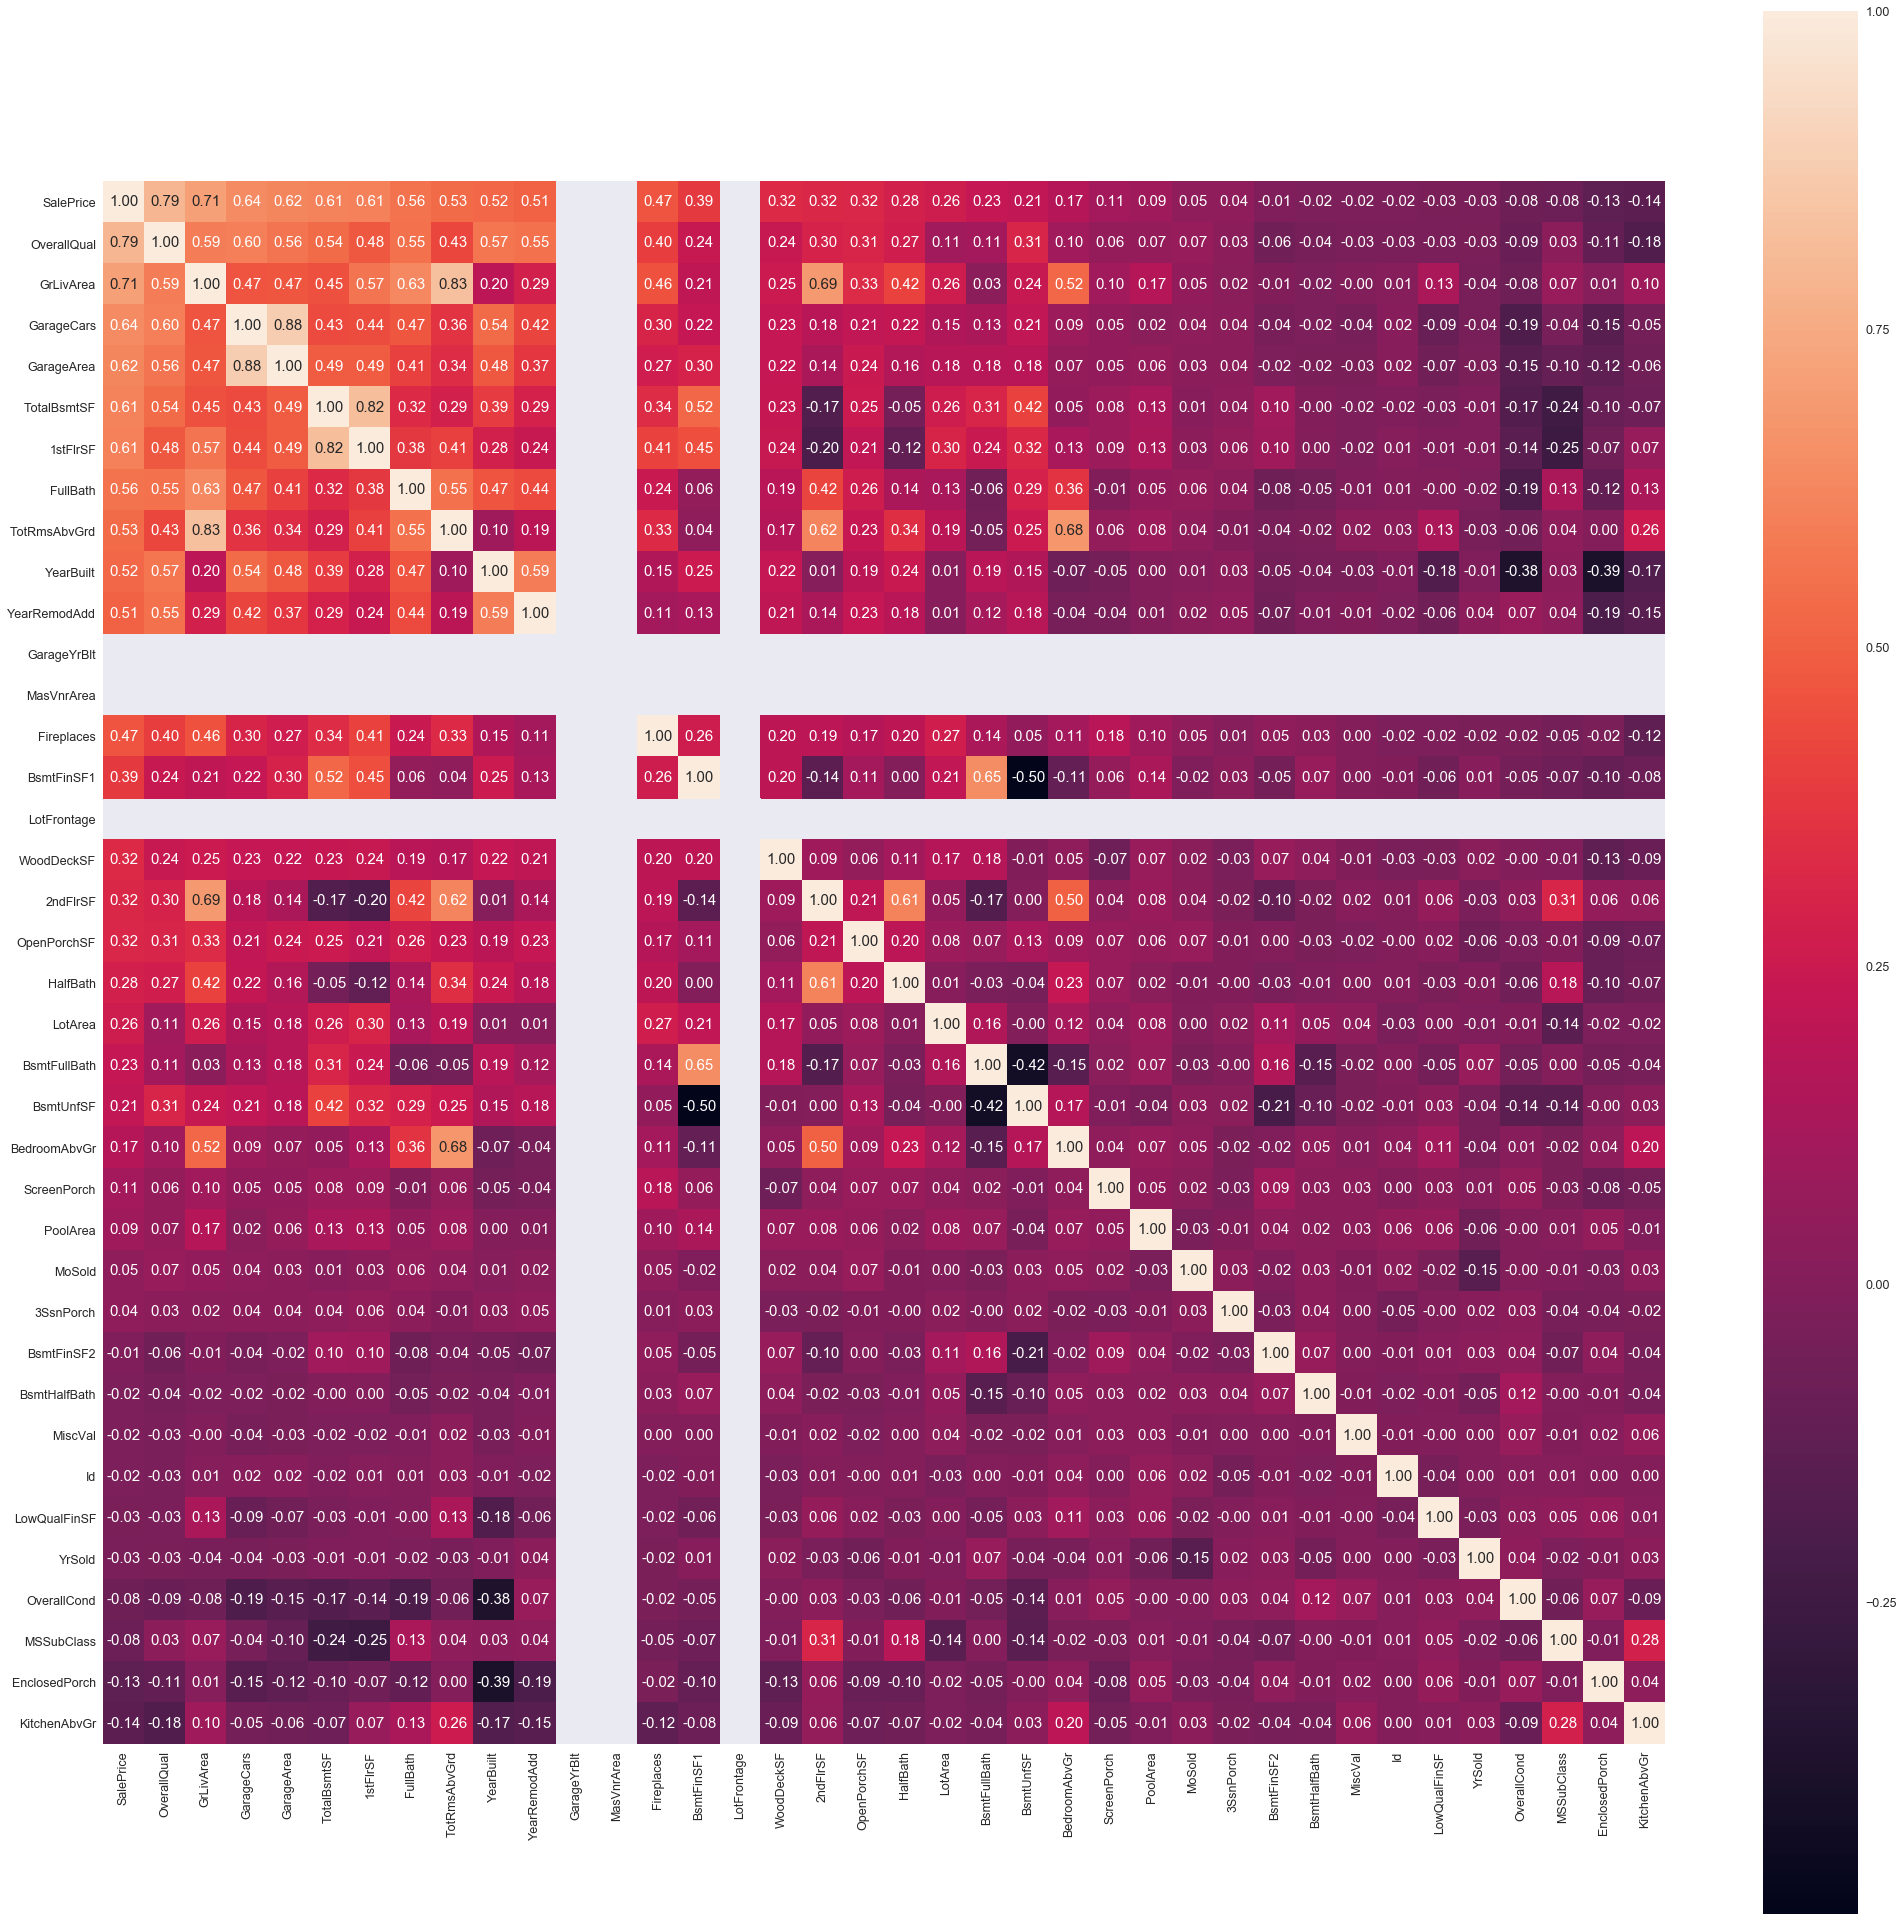

In [97]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(35, 35))


k = 80 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [98]:
def correlation_rubric(cor_threshold):
#cor_threashold is numeric
#returns features that have a correlation greater than cor_threashold
    colnames = list(corrmat)
    x= []
    for colname in colnames:
        x.append(corrmat.loc[corrmat[colname] > cor_threshold].index.values)
    x_df = pd.DataFrame(x)
    
    x_df['index'] = colnames
    x_df.set_index('index', inplace=True)
    y = []
    for colname in colnames:
        y.append(train['SalePrice'].corr(train[colname]))
    x_df['SalePrice Correlation'] = y
    return x_df

correlation_rubric(0.65)

0             1             2          3  \
index                                                                 
Id                        Id          None          None       None   
MSSubClass        MSSubClass          None          None       None   
LotFrontage      LotFrontage          None          None       None   
LotArea              LotArea          None          None       None   
OverallQual      OverallQual     SalePrice          None       None   
OverallCond      OverallCond          None          None       None   
YearBuilt          YearBuilt   GarageYrBlt          None       None   
YearRemodAdd    YearRemodAdd          None          None       None   
MasVnrArea        MasVnrArea          None          None       None   
BsmtFinSF1        BsmtFinSF1          None          None       None   
BsmtFinSF2        BsmtFinSF2          None          None       None   
BsmtUnfSF          BsmtUnfSF          None          None       None   
TotalBsmtSF      TotalBsmtSF      1stFlrSF          None       None   
1stFlrSF         TotalBsmtSF      1stFlrSF          None       None   
2ndFlrSF            2ndFlrSF     GrLivArea          None       None   
LowQualFinSF    LowQualFinSF          None          None       None   
GrLivArea           2ndFlrSF     GrLivArea  TotRmsAbvGrd  SalePrice   
BsmtFullBath    BsmtFullBath          None          None       None   
BsmtHalfBath    BsmtHalfBath          None          None       None   
FullBath            FullBath          None          None       None   
HalfBath            HalfBath          None          None       None   
BedroomAbvGr    BedroomAbvGr  TotRmsAbvGrd          None       None   
KitchenAbvGr    KitchenAbvGr          None          None       None   
TotRmsAbvGrd       GrLivArea  BedroomAbvGr  TotRmsAbvGrd       None   
Fireplaces        Fireplaces          None          None       None   
GarageYrBlt        YearBuilt   GarageYrBlt          None       None   
GarageCars        GarageCars    GarageArea          None       None   
GarageArea        GarageCars    GarageArea          None       None   
WoodDeckSF        WoodDeckSF          None          None       None   
OpenPorchSF      OpenPorchSF          None          None       None   
EnclosedPorch  EnclosedPorch          None          None       None   
3SsnPorch          3SsnPorch          None          None       None   
ScreenPorch      ScreenPorch          None          None       None   
PoolArea            PoolArea          None          None       None   
MiscVal              MiscVal          None          None       None   
MoSold                MoSold          None          None       None   
YrSold                YrSold          None          None       None   
SalePrice        OverallQual     GrLivArea     SalePrice       None   

               SalePrice Correlation  
index                                 
Id                         -0.021917  
MSSubClass                 -0.084284  
LotFrontage                 0.351799  
LotArea                     0.263843  
OverallQual                 0.790982  
OverallCond                -0.077856  
YearBuilt                   0.522897  
YearRemodAdd                0.507101  
MasVnrArea                  0.477493  
BsmtFinSF1                  0.386420  
BsmtFinSF2                 -0.011378  
BsmtUnfSF                   0.214479  
TotalBsmtSF                 0.613581  
1stFlrSF                    0.605852  
2ndFlrSF                    0.319334  
LowQualFinSF               -0.025606  
GrLivArea                   0.708624  
BsmtFullBath                0.227122  
BsmtHalfBath               -0.016844  
FullBath                    0.560664  
HalfBath                    0.284108  
BedroomAbvGr                0.168213  
KitchenAbvGr               -0.135907  
TotRmsAbvGrd                0.533723  
Fireplaces                  0.466929  
GarageYrBlt                 0.486362  
GarageCars                  0.640409  
GarageArea                  0.623431  
WoodDeckSF      

In [ ]:
#creating a df for normalzing features
# train_normalized = train_test_df.copy()

In [99]:
dropped_columns = ['Id','YearBuilt','Utilities','ExterCond','BsmtFinType1','BsmtFinType2','BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath','BedroomAbvGr','Fireplaces','GarageYrBlt','GarageCond','3SsnPorch','PoolQC','MiscVal','MoSold','YrSold']
train_test_df.drop(dropped_columns,axis=1, inplace=True)

In [100]:
train_test_df.shape

(2919, 60)

In [101]:
numeric_feats = train_test_df.dtypes[train_test_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train_test_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



Skew
PoolArea       16.898328
LotArea        12.822431
KitchenAbvGr    4.302254
EnclosedPorch   4.003891
ScreenPorch     3.946694
LotConfig       3.526015
MasVnrArea      2.613592
OpenPorchSF     2.535114
WoodDeckSF      1.842433
TotalSF         1.511479
LotFrontage     1.502351
BsmtFinSF1      1.425230
BsmtExposure    1.118027
MasVnrType      1.045799
BsmtUnfSF       0.919339
ExterQual       0.786382
TotRmsAbvGrd    0.758367
HalfBath        0.694566
BsmtFullBath    0.624832
HouseAge        0.599806
OverallCond     0.570312
KitchenQual     0.438535
GarageArea      0.239257
OverallQual     0.197110
FireplaceQu     0.172181
FullBath        0.167606
GarageFinish    0.135534
GarageCars     -0.219581
YearRemodAdd   -0.451020
HeatingQC      -0.549910
LotShape       -0.569186
MSZoning       -0.826428
BsmtQual       -1.268542
PavedDrive     -2.979084
GarageQual     -3.263676
Electrical     -3.335206
CentralAir     -3.459022
BsmtCond       -3.604111
LandSlope      -4.213417
Functional     -4.963567

In [102]:
skewness.to_csv('skewness.csv')

In [103]:
#categorical ordinal variables:
skewness = skewness[skewness.index !='PoolQC']
skewness = skewness[skewness.index !='BsmtFinType2']
skewness = skewness[skewness.index !='ExterCond']
skewness = skewness[skewness.index !='BsmtExposure']
skewness = skewness[skewness.index !='ExterQual']
skewness = skewness[skewness.index !='OverallCond']
skewness = skewness[skewness.index !='OverallQual']
skewness = skewness[skewness.index !='KitchenQual']
skewness = skewness[skewness.index !='GarageFinish']
skewness = skewness[skewness.index !='FireplaceQu']
skewness = skewness[skewness.index !='BsmtFinType1']
skewness = skewness[skewness.index !='HeatingQC']
skewness = skewness[skewness.index !='BsmtQual']
skewness = skewness[skewness.index !='LotShape']
skewness = skewness[skewness.index !='GarageQual']
skewness = skewness[skewness.index !='Electrical']
skewness = skewness[skewness.index !='GarageCond']
skewness = skewness[skewness.index !='CentralAir']
skewness = skewness[skewness.index !='BsmtCond']
skewness = skewness[skewness.index !='LandSlope']
skewness = skewness[skewness.index !='Functional']


#non-numeric variables
skewness = skewness[skewness.index !='MSSubClass'] #as MSSubClass is not a number actually
# skewness = skewness[skewness.index !='YrSold'] #do transform years
# skewness = skewness[skewness.index !='YearRemodAdd']
# skewness = skewness[skewness.index !='YearBuilt']
# skewness = skewness[skewness.index !='GarageYrBlt']
skewness = skewness[skewness.index !='Id']

#lotfrontage omitted since we need to transform it after imputing
skewness = skewness[skewness.index !='LotFrontage']

skewness = skewness[skewness.index !='SalePrice']

skewness

Skew
PoolArea       16.898328
LotArea        12.822431
KitchenAbvGr    4.302254
EnclosedPorch   4.003891
ScreenPorch     3.946694
LotConfig       3.526015
MasVnrArea      2.613592
OpenPorchSF     2.535114
WoodDeckSF      1.842433
TotalSF         1.511479
BsmtFinSF1      1.425230
MasVnrType      1.045799
BsmtUnfSF       0.919339
TotRmsAbvGrd    0.758367
HalfBath        0.694566
BsmtFullBath    0.624832
HouseAge        0.599806
GarageArea      0.239257
FullBath        0.167606
GarageCars     -0.219581
YearRemodAdd   -0.451020
MSZoning       -0.826428
PavedDrive     -2.979084

In [104]:
skewness = skewness[(skewness) > 0.75] #generally 0.75 or 0.8 used as cutoff
print("There are {} skewed numerical features to log transform".format(skewness.shape[0]))

skewed_features = skewness.index
skewed_features

#check_logvalues = []
#check_logvalues=pd.DataFrame(check_logvalues)

for feat in skewed_features:
       train_test_df[feat] = np.log1p(train_test_df[feat])
        
train_test_df

There are 23 skewed numerical features to log transform


MSSubClass  MSZoning  LotFrontage    LotArea Street    Alley  LotShape  \
0            20  0.693147         80.0   9.360741   Pave  NoAlley         1   
1            20  1.098612         81.0   9.565775   Pave  NoAlley         0   
2            60  1.098612         74.0   9.534668   Pave  NoAlley         0   
3            60  1.098612         78.0   9.208238   Pave  NoAlley         0   
4           120  1.098612         43.0   8.518392   Pave  NoAlley         0   
5            60  1.098612         75.0   9.210440   Pave  NoAlley         0   
6            20  1.098612          NaN   8.984819   Pave  NoAlley         0   
7            60  1.098612         63.0   9.036344   Pave  NoAlley         0   
8            20  1.098612         85.0   9.227886   Pave  NoAlley         1   
9            20  1.098612         70.0   9.036106   Pave  NoAlley         1   
10          120  0.693147         26.0   8.675734   Pave  NoAlley         0   
11          160  0.693147         21.0   7.427144   Pave  NoAlley         1   
12          160  0.693147         21.0   7.427144   Pave  NoAlley         1   
13          160  1.098612         24.0   7.732369   Pave  NoAlley         1   
14          120  1.098612         24.0   7.732369   Pave  NoAlley         1   
15           60  1.098612        102.0   9.461799   Pave  NoAlley         0   
16           20  1.098612         94.0   9.463742   Pave  NoAlley         0   
17           20  1.098612         90.0   9.351927   Pave  NoAlley         1   
18           20  1.098612         79.0   9.555560   Pave  NoAlley         0   
19           20  1.098612        110.0   9.568085   Pave  NoAlley         1   
20           60  1.098612        105.0   9.521568   Pave  NoAlley         1   
21          120  1.098612         41.0   8.872487   Pave  NoAlley         0   
22           20  1.098612        100.0   9.825256   Pave  NoAlley         0   
23          120  1.098612         43.0   8.072155   Pave  NoAlley         1   
24           80  1.098612         67.0   9.495594   Pave  NoAlley         0   
25           60  1.098612         63.0   9.056956   Pave  NoAlley         0   
26           60  1.098612         60.0   9.766178   Pave  NoAlley         0   
27           20  1.098612         73.0   9.103646   Pave  NoAlley         1   
28           20  1.386294         92.0   9.128696   Pave  NoAlley         1   
29           20  1.386294         84.0   9.253496   Pave  NoAlley         1   
...         ...       ...          ...        ...    ...      ...       ...   
1430         60  1.098612         60.0   9.995656   Pave  NoAlley         0   
1431        120  1.098612          NaN   8.502891   Pave  NoAlley         0   
1432         30  1.098612         60.0   9.287394   Pave     Grvl         1   
1433         60  1.098612         93.0   9.236203   Pave  NoAlley         0   
1434         20  1.098612         80.0   9.764283   Pave  NoAlley         1   
1435         20  1.098612         80.0   9.036106   Pave  NoAlley         1   
1436         20  1.098612         60.0   9.105091   Pave  NoAlley         1   
1437         20  1.098612         96.0   9.429074   Pave  NoAlley         1   
1438         20  0.693147         90.0   8.910316   Pave  NoAlley         1   
1439         60  1.098612         80.0   9.357466   Pave  NoAlley         1   
1440         70  1.098612         79.0   9.352447   Pave  NoAlley         0   
1441        120  0.693147          NaN   8.395477   Pave  NoAlley         1   
1442         60  1.386294         85.0   9.306014   Pave  NoAlley         1   
1443         30  1.098612          NaN   9.088738   Pave  NoAlley         1   
1444         20  1.098612         63.0   9.047939   Pave  NoAlley         1   
1445         85  1.098612         70.0   9.036106   Pave  NoAlley         1   
1446         20  1.098612          NaN  10.171337   Pave  NoAlley         0   
1447         60  1.098612         80.0   9.210440   Pave  NoAlley         1   
1448         50  1.098612         70.0   9.373139   Pav

In [140]:
numeric_feats = train_test_df.dtypes[train_test_df.dtypes != "object"].index

# Check the skew of all numerical features
transformed_skewed_feat = train_test_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features after log transforation: \n")

pd.DataFrame({'Skew' :transformed_skewed_feat})


Skew in numerical features after log transforation: 



Skew
MiscFeature_TenC      54.000003
RoofMatl_Membran      54.000003
Condition2_RRAn       54.000003
Exterior1st_ImStucc   54.000003
RoofMatl_Metal        54.000003
RoofMatl_Roll         54.000003
Condition2_RRAe       54.000003
Exterior2nd_Other     54.000003
MSSubClass_150        54.000003
Condition2_RRNn       38.164128
Exterior1st_AsphShn   38.164128
Exterior1st_CBlock    38.164128
Heating_OthW          38.164128
Exterior1st_Stone     38.164128
Exterior2nd_CBlock    31.144840
MiscFeature_Othr      26.958327
Condition2_PosN       26.958327
Condition2_PosA       26.958327
Exterior2nd_AsphShn   26.958327
SaleType_Con          24.099828
RoofStyle_Shed        24.099828
Foundation_Wood       24.099828
Condition1_RRNe       21.988680
Exterior2nd_Stone     21.988680
Exterior1st_BrkComm   21.988680
Heating_Wall          21.988680
MSSubClass_40         21.988680
RoofMatl_WdShngl      20.347049
SaleType_Oth          20.347049
HouseStyle_2.5Fin     19.023085
...                         ...
LotArea               -0.504751
HeatingQC             -0.549910
HouseAge              -0.568796
LotShape              -0.569186
BsmtFinSF1            -0.616632
LotFrontage           -0.957426
BsmtQual              -1.268542
GarageCars            -1.275584
RoofStyle_Gable       -1.434134
Fence_NoFence         -1.534689
SaleCondition_Normal  -1.691530
MSZoning              -1.906139
Condition1_Norm       -2.077714
SaleType_WD           -2.140809
BsmtUnfSF             -2.155206
LandContour_Lvl       -2.634683
PavedDrive            -3.080258
GarageQual            -3.263676
Electrical            -3.335206
Alley_NoAlley         -3.437323
CentralAir            -3.459022
GarageArea            -3.510452
BsmtCond              -3.604111
LandSlope             -4.213417
Functional            -4.963567
MiscFeature_NoMisc    -4.983705
Heating_GasA          -7.866532
RoofMatl_CompShg      -8.055971
Condition2_Norm       -9.711353
Street_Pave          -15.500133

[189 rows x 1 columns]

In [105]:
list(train_test_df)

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'TotalSF',
 'HouseAge']

In [106]:
np.sum(train_test_df.isnull())

MSSubClass         0
MSZoning           0
LotFrontage      486
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinSF1         0
BsmtUnfSF          0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
BsmtFullBath       0
FullBath           0
HalfBath           0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
FireplaceQu        0
GarageType         0
GarageFinish       0
GarageCars         0
GarageArea         0
GarageQual   

## Dummifying Categorical Features

In [ ]:
# train_normalized_dummies = train_test_df.copy()

In [107]:
# not using MsnVnrType for now to dummify as it has NAs
train_test_df = pd.get_dummies(train_test_df, prefix=None, prefix_sep='_', dummy_na=False, columns=['MSSubClass','Street','Alley','LandContour','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','GarageType','Fence','MiscFeature','SaleType','SaleCondition',], sparse=False, drop_first=True)

In [108]:
train_test_df.shape

(2919, 189)

In [109]:
train_test_df

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
0     0.693147         80.0   9.360741         1   0.000000          1   
1     1.098612         81.0   9.565775         0   0.000000          1   
2     1.098612         74.0   9.534668         0   0.000000          1   
3     1.098612         78.0   9.208238         0   0.000000          1   
4     1.098612         43.0   8.518392         0   0.000000          1   
5     1.098612         75.0   9.210440         0   0.000000          1   
6     1.098612          NaN   8.984819         0   0.000000          1   
7     1.098612         63.0   9.036344         0   0.000000          1   
8     1.098612         85.0   9.227886         1   0.000000          1   
9     1.098612         70.0   9.036106         1   0.000000          1   
10    0.693147         26.0   8.675734         0   0.000000          1   
11    0.693147         21.0   7.427144         1   0.000000          1   
12    0.693147         21.0   7.427144         1   0.000000          1   
13    1.098612         24.0   7.732369         1   0.000000          1   
14    1.098612         24.0   7.732369         1   0.000000          1   
15    1.098612        102.0   9.461799         0   0.000000          1   
16    1.098612         94.0   9.463742         0   0.000000          1   
17    1.098612         90.0   9.351927         1   0.000000          1   
18    1.098612         79.0   9.555560         0   0.000000          1   
19    1.098612        110.0   9.568085         1   0.000000          0   
20    1.098612        105.0   9.521568         1   0.000000          1   
21    1.098612         41.0   8.872487         0   0.000000          1   
22    1.098612        100.0   9.825256         0   0.000000          1   
23    1.098612         43.0   8.072155         1   0.000000          1   
24    1.098612         67.0   9.495594         0   0.000000          1   
25    1.098612         63.0   9.056956         0   0.000000          1   
26    1.098612         60.0   9.766178         0   0.693147          1   
27    1.098612         73.0   9.103646         1   0.000000          1   
28    1.386294         92.0   9.128696         1   0.000000          1   
29    1.386294         84.0   9.253496         1   0.000000          1   
...        ...          ...        ...       ...        ...        ...   
1430  1.098612         60.0   9.995656         0   0.000000          1   
1431  1.098612          NaN   8.502891         0   0.000000          1   
1432  1.098612         60.0   9.287394         1   0.000000          1   
1433  1.098612         93.0   9.236203         0   0.000000          1   
1434  1.098612         80.0   9.764283         1   0.000000          0   
1435  1.098612         80.0   9.036106         1   0.000000          1   
1436  1.098612         60.0   9.105091         1   0.000000          1   
1437  1.098612         96.0   9.429074         1   0.000000          1   
1438  0.693147         90.0   8.910316         1   0.000000          1   
1439  1.098612         80.0   9.357466         1   0.000000          1   
1440  1.098612         79.0   9.352447         0   0.000000          0   
1441  0.693147          NaN   8.395477         1   0.000000          1   
1442  1.386294         85.0   9.306014         1   0.000000          1   
1443  1.098612          NaN   9.088738         1   0.000000          1   
1444  1.098612         63.0   9.047939         1   0.000000          1   
1445  1.098612         70.0   9.036106         1   0.000000          1   
1446  1.098612          NaN  10.171337         0   0.693147          1   
1447  1.098612         80.0   9.210440         1   0.000000          1   
1448  1.098612         70.0   9.373139         1   0.000000          1   
1449  0.693147         21.0   7.335634         1   0.000000          1   
1450  1.098612         60.0   9.105091         1   0.000000          1   
1451  1.098612         78.0   9.133783         1   0.000000          1   
1452  0.69

## Imputing for LotFrontage using knn

In [110]:
test_knn_LotFrontage = train_test_df[train_test_df.LotFrontage.isna()]
test_knn_LotFrontage

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
6     1.098612          NaN   8.984819         0   0.000000          1   
40    1.386294          NaN   8.000014         1   0.000000          1   
41    1.386294          NaN   7.784889         0   0.000000          1   
45    1.098612          NaN   9.255027         0   0.000000          1   
47    1.098612          NaN   9.843631         0   0.000000          1   
52    1.098612          NaN   9.268704         0   0.000000          1   
59    1.098612          NaN   8.993552         0   0.000000          1   
75    0.693147          NaN   9.016756         1   0.000000          1   
82    1.098612          NaN   8.961109         0   0.000000          1   
98    0.000000          NaN   8.771835         0   0.000000          1   
103   1.098612          NaN   8.912608         0   0.000000          1   
105   1.098612          NaN   9.906633         0   0.000000          0   
107   1.098612          NaN   9.745839         0   0.693147          0   
113   1.098612          NaN   9.323758         0   0.693147          1   
119   1.098612          NaN   9.141847         0   0.000000          1   
124   0.693147          NaN   8.397508         1   0.000000          1   
132   1.098612          NaN   8.973478         1   0.000000          1   
146   1.098612          NaN   9.454149         0   0.000000          1   
152   1.098612          NaN   9.382275         1   0.000000          1   
167   1.098612          NaN   9.375261         0   0.000000          1   
174   1.098612          NaN   9.082961         0   0.000000          1   
177   1.098612          NaN   9.491828         0   0.000000          1   
179   1.098612          NaN   9.424564         0   0.000000          1   
182   1.386294          NaN   8.922792         1   0.000000          1   
183   1.386294          NaN   9.044404         1   0.000000          1   
184   1.098612          NaN   9.145695         0   0.693147          1   
187   1.098612          NaN   8.965845         0   0.000000          1   
188   1.098612          NaN   9.049115         0   0.000000          1   
199   1.098612          NaN   9.279027         1   0.000000          1   
229   1.098612          NaN   9.101195         0   0.000000          1   
...        ...          ...        ...       ...        ...        ...   
1300  1.098612          NaN   9.283870         0   0.693147          1   
1301  1.098612          NaN   8.922792         0   0.000000          1   
1309  1.098612          NaN   8.875427         1   0.000000          1   
1312  1.098612          NaN   9.166702         0   0.000000          1   
1318  1.098612          NaN   9.601166         0   0.693147          1   
1321  1.098612          NaN   8.799058         0   0.000000          1   
1342  1.098612          NaN   9.145909         1   0.000000          1   
1346  1.098612          NaN   9.941843         0   0.693147          1   
1348  1.098612          NaN   9.692581         0   0.000000          1   
1354  1.098612          NaN   9.241548         0   0.000000          1   
1356  1.098612          NaN   9.156729         1   0.000000          1   
1357  1.098612          NaN   9.436519         0   0.693147          1   
1358  1.386294          NaN   7.658228         1   0.000000          1   
1362  1.098612          NaN   9.434603         0   0.000000          1   
1365  1.386294          NaN   8.922792         1   0.000000          1   
1368  0.693147          NaN   8.397508         1   0.000000          1   
1373  1.098612          NaN   9.341456         1   0.000000          1   
1381  1.098612          NaN   9.466996         0   0.000000          1   
1383  1.098612          NaN  10.140139         1   0.000000          1   
1396  1.098612          NaN  10.954327         0   0.000000          0   
1407  1.098612          NaN   9.080346         0   0.000000          1   
1417  1.098612          NaN   9.713900         0   0.000000          1   
1419  1.09

In [111]:
train_knn_LotFrontage = train_test_df[-train_test_df.LotFrontage.isna()]
train_knn_LotFrontage

MSZoning  LotFrontage   LotArea  LotShape  LotConfig  LandSlope  \
0     0.693147         80.0  9.360741         1   0.000000          1   
1     1.098612         81.0  9.565775         0   0.000000          1   
2     1.098612         74.0  9.534668         0   0.000000          1   
3     1.098612         78.0  9.208238         0   0.000000          1   
4     1.098612         43.0  8.518392         0   0.000000          1   
5     1.098612         75.0  9.210440         0   0.000000          1   
7     1.098612         63.0  9.036344         0   0.000000          1   
8     1.098612         85.0  9.227886         1   0.000000          1   
9     1.098612         70.0  9.036106         1   0.000000          1   
10    0.693147         26.0  8.675734         0   0.000000          1   
11    0.693147         21.0  7.427144         1   0.000000          1   
12    0.693147         21.0  7.427144         1   0.000000          1   
13    1.098612         24.0  7.732369         1   0.000000          1   
14    1.098612         24.0  7.732369         1   0.000000          1   
15    1.098612        102.0  9.461799         0   0.000000          1   
16    1.098612         94.0  9.463742         0   0.000000          1   
17    1.098612         90.0  9.351927         1   0.000000          1   
18    1.098612         79.0  9.555560         0   0.000000          1   
19    1.098612        110.0  9.568085         1   0.000000          0   
20    1.098612        105.0  9.521568         1   0.000000          1   
21    1.098612         41.0  8.872487         0   0.000000          1   
22    1.098612        100.0  9.825256         0   0.000000          1   
23    1.098612         43.0  8.072155         1   0.000000          1   
24    1.098612         67.0  9.495594         0   0.000000          1   
25    1.098612         63.0  9.056956         0   0.000000          1   
26    1.098612         60.0  9.766178         0   0.693147          1   
27    1.098612         73.0  9.103646         1   0.000000          1   
28    1.386294         92.0  9.128696         1   0.000000          1   
29    1.386294         84.0  9.253496         1   0.000000          1   
30    1.098612         70.0  9.386057         1   0.000000          1   
...        ...          ...       ...       ...        ...        ...   
1425  1.098612         80.0  9.280053         0   0.000000          1   
1426  1.098612         81.0  9.300638         0   0.000000          1   
1427  1.098612         60.0  9.299358         1   0.000000          1   
1428  0.693147         60.0  8.881975         1   0.000000          1   
1430  1.098612         60.0  9.995656         0   0.000000          1   
1432  1.098612         60.0  9.287394         1   0.000000          1   
1433  1.098612         93.0  9.236203         0   0.000000          1   
1434  1.098612         80.0  9.764283         1   0.000000          0   
1435  1.098612         80.0  9.036106         1   0.000000          1   
1436  1.098612         60.0  9.105091         1   0.000000          1   
1437  1.098612         96.0  9.429074         1   0.000000          1   
1438  0.693147         90.0  8.910316         1   0.000000          1   
1439  1.098612         80.0  9.357466         1   0.000000          1   
1440  1.098612         79.0  9.352447         0   0.000000          0   
1442  1.386294         85.0  9.306014         1   0.000000          1   
1444  1.098612         63.0  9.047939         1   0.000000          1   
1445  1.098612         70.0  9.036106         1   0.000000          1   
1447  1.098612         80.0  9.210440         1   0.000000          1   
1448  1.098612         70.0  9.373139         1   0.000000          1   
1449  0.693147         21.0  7.335634         1   0.000000          1   
1450  1.098612         60.0  9.105091         1   0.000000          1   
1451  1.098612         78.0  9.133783         1   0.000000          1   
1452  0.693147         35.0  8.209580         1   0.000000      

In [112]:
y_col_for_knn = ["LotFrontage"]

In [113]:
train_knn_LotFrontage[y_col_for_knn]

LotFrontage
0            80.0
1            81.0
2            74.0
3            78.0
4            43.0
5            75.0
7            63.0
8            85.0
9            70.0
10           26.0
11           21.0
12           21.0
13           24.0
14           24.0
15          102.0
16           94.0
17           90.0
18           79.0
19          110.0
20          105.0
21           41.0
22          100.0
23           43.0
24           67.0
25           63.0
26           60.0
27           73.0
28           92.0
29           84.0
30           70.0
...           ...
1425         80.0
1426         81.0
1427         60.0
1428         60.0
1430         60.0
1432         60.0
1433         93.0
1434         80.0
1435         80.0
1436         60.0
1437         96.0
1438         90.0
1439         80.0
1440         79.0
1442         85.0
1444         63.0
1445         70.0
1447         80.0
1448         70.0
1449         21.0
1450         60.0
1451         78.0
1452         35.0
1453         90.0
1454         62.0
1455         62.0
1456         85.0
1457         66.0
1458         68.0
1459         75.0

[2433 rows x 1 columns]

In [114]:
test_knn_LotFrontage[y_col_for_knn]

LotFrontage
6             NaN
40            NaN
41            NaN
45            NaN
47            NaN
52            NaN
59            NaN
75            NaN
82            NaN
98            NaN
103           NaN
105           NaN
107           NaN
113           NaN
119           NaN
124           NaN
132           NaN
146           NaN
152           NaN
167           NaN
174           NaN
177           NaN
179           NaN
182           NaN
183           NaN
184           NaN
187           NaN
188           NaN
199           NaN
229           NaN
...           ...
1300          NaN
1301          NaN
1309          NaN
1312          NaN
1318          NaN
1321          NaN
1342          NaN
1346          NaN
1348          NaN
1354          NaN
1356          NaN
1357          NaN
1358          NaN
1362          NaN
1365          NaN
1368          NaN
1373          NaN
1381          NaN
1383          NaN
1396          NaN
1407          NaN
1417          NaN
1419          NaN
1423          NaN
1424          NaN
1429          NaN
1431          NaN
1441          NaN
1443          NaN
1446          NaN

[486 rows x 1 columns]

In [115]:
list(train_test_df.columns[train_test_df.dtypes == "object"])

[]

In [116]:
x_col_knn = list(train_test_df.columns[train_test_df.dtypes != "object"])
x_col_knn

['MSZoning',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LotConfig',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'TotalSF',
 'HouseAge',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'Street_Pave',
 'Alley_NoAlley',
 'Alley_Pave',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Neighborhood_Blueste

In [117]:
#excluding MsnVnrArea for now as it has NAs
#x_col_knn = x_col_knn[3:8] + x_col_knn[9:]
x_col_knn.remove('LotFrontage')

In [118]:
x_col_knn

['MSZoning',
 'LotArea',
 'LotShape',
 'LotConfig',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'TotalSF',
 'HouseAge',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'Street_Pave',
 'Alley_NoAlley',
 'Alley_Pave',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Neighborhood_Blueste',
 'Neighborhoo

In [119]:
 # create training and testing vars
from sklearn.model_selection import train_test_split

import random

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(train_knn_LotFrontage, train_knn_LotFrontage["LotFrontage"], test_size=0.2, random_state = 0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1946, 189) (1946,)
(487, 189) (487,)


In [120]:
X_train

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
164   1.098612         74.0   9.473397         0   0.000000          1   
235   0.693147         21.0   7.427144         1   0.000000          1   
556   1.098612         69.0   9.605822         0   0.000000          1   
954   1.098612         70.0   8.997023         1   0.000000          1   
1252  1.386294         34.0   8.196712         1   0.000000          1   
684   1.098612         94.0   9.131297         1   0.000000          1   
479   0.693147         50.0   8.687105         1   0.000000          1   
496   1.098612         80.0   9.249657         1   0.000000          1   
868   1.098612         58.0   9.157783         0   0.000000          1   
870   1.098612         60.0   8.794976         1   0.000000          1   
853   1.098612         58.0   9.488351         0   0.000000          1   
619   1.098612         85.0   9.412873         1   0.000000          1   
305   1.098612         92.0   9.266153         0   0.000000          1   
512   1.098612         70.0   9.116140         1   0.000000          1   
1397  0.693147         51.0   8.719481         1   0.000000          1   
796   1.098612         71.0   9.011646         1   0.000000          1   
139   1.098612         65.0   9.643875         0   0.000000          1   
786   0.693147         21.0   7.298445         1   0.000000          1   
352   0.693147         50.0   8.699681         1   0.000000          1   
263   0.693147         50.0   8.612685         1   0.000000          1   
788   0.693147         50.0   8.699681         1   0.000000          1   
311   1.098612         70.0   9.076923         1   0.000000          1   
644   0.693147         60.0   8.699681         1   0.000000          1   
31    0.693147         70.0   9.190240         1   0.000000          1   
1026  1.098612         99.0   9.727943         1   0.000000          1   
1043  1.098612        104.0  10.082512         1   0.000000          1   
716   1.098612         41.0   9.297068         0   0.693147          1   
1246  1.386294         65.0   9.002824         1   0.000000          1   
839   1.098612         70.0   9.373139         1   0.000000          1   
457   1.098612         75.0   9.185125         1   0.000000          1   
...        ...          ...        ...       ...        ...        ...   
851   1.098612         59.0   9.668461         0   0.000000          1   
641   0.693147         53.0   8.585039         1   0.000000          1   
765   1.098612         74.0   9.209440         1   0.000000          1   
502   0.693147         21.0   7.544861         1   0.000000          1   
788   1.098612         60.0   8.794976         1   0.000000          1   
946   1.098612         65.0   8.833608         0   0.000000          1   
1438  0.693147         90.0   8.910316         1   0.000000          1   
937   1.098612         75.0   9.177404         1   0.000000          1   
112   1.098612         44.0   9.769156         0   0.000000          1   
768   1.098612         70.0   9.116140         1   0.000000          1   
984   1.098612         75.0   9.222862         1   0.000000          1   
895   1.098612         60.0   9.429556         1   0.000000          1   
1163  1.098612         42.0   9.528940         0   0.693147          1   
1128  1.098612         59.0   9.375601         0   0.000000          1   
850   0.693147         36.0   8.397508         1   0.000000          1   
1076  1.098612         60.0   9.287394         1   0.000000          1   
634   0.693147         60.0   9.287394         1   0.000000          1   
567   1.098612         70.0   9.227394         0   0.000000          1   
1200  1.098612         71.0   9.143559         1   0.000000          1   
1094  1.098612         74.0   8.677440         1   0.000000          1   
842   1.098612         71.0   9.132919         0   0.000000          1   
1376  1.098612         52.0   8.747193         1   0.000000          1   
717   1.09

In [121]:
#X_train.isna()

X_train_nas = np.sum(X_train.isna())
X_train_nas[X_train_nas>0]

Series([], dtype: int64)

In [122]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.cross_validation import cross_val_score

k_range = range(1, 20)

# list of scores from k_range
k_scores = []

X=train_knn_LotFrontage[x_col_knn]
y=train_knn_LotFrontage[y_col_for_knn]
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsRegressor(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(max(k_scores))


C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


-385.2450666944014


In [123]:
k_scores

[-548.2224988194023,
 -415.5485132901572,
 -398.1524239732547,
 -388.83941615226337,
 -386.1101246036565,
 -385.2450666944014,
 -385.64726806934067,
 -385.83330070878026,
 -388.24261428893874,
 -388.53791374890375,
 -389.74373190423864,
 -391.0648729077185,
 -392.0737498937163,
 -393.77946287450425,
 -396.9306178236525,
 -398.81497855686683,
 -399.17346386904103,
 -400.01319411650064,
 -400.60140175305906]

Text(0,0.5,'neg_mean_squared_error')

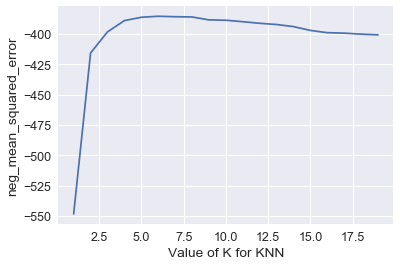

In [124]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('neg_mean_squared_error')

In [125]:
random.seed(0)
knn = KNeighborsRegressor(n_neighbors=5) #tried different no and 5 has one of  the lowest mse
knn.fit(X_train[x_col_knn], y_train)
predictions = knn.predict(X_test[x_col_knn])

len(predictions)

487

In [126]:
actual = y_test
mse = (((predictions - actual) ** 2).sum()) / len(predictions)
mse

519.2080492813142

In [127]:
predictions_lotfrontage = knn.predict(test_knn_LotFrontage[x_col_knn])
train_test_df.loc[train_test_df["LotFrontage"].isna(),"LotFrontage"] = predictions_lotfrontage

In [128]:
predictions_lotfrontage 

array([ 74.8,  34.4,  66.8,  79. ,  51.6,  80. ,  72.8,  55.4,  64.2,
        63.4,  61. ,  74.2,  73.2,  77.8,  63.4,  41.2,  68.8,  77.2,
        63.4,  93.4,  58. ,  87.2,  84.4,  64.6,  70.6,  83.6,  64. ,
        73.6,  78. ,  60. ,  67.4,  66. ,  79.8,  78. ,  89.6,  64.2,
        62.6,  63. ,  72. ,  66.6,  68.6,  84. ,  82.2,  85.2,  98.2,
        66.6,  72. ,  85.4,  93.6,  86.4,  78.2,  93.2,  42.2,  65.6,
        62.6,  66.2,  67.8,  85.8,  77.2,  82.8,  72.8,  72.8,  72.8,
        79. ,  72.4,  90.4,  71.8,  88.6,  58.6,  70.4,  70.6,  62.6,
        70. ,  67.2,  70.8,  85.2,  71.8,  88.6,  81.6,  55.8,  53.2,
        58. ,  74.6,  80.8,  88.8,  88.8,  79. ,  59. ,  65. ,  84.6,
        69.2,  72.2,  72.6,  80.6,  67.4,  66. ,  64.4,  62.6,  67.2,
        61.8,  55.6,  56.2,  73.4,  63.8,  75.4,  62. ,  72.6,  63.4,
        83.6,  70.6,  85.6,  76.4,  80.6,  67.2,  69.2,  83.4,  78. ,
        90.6,  98.4,  41.2,  67.2,  67.2,  86.8,  71.4,  70.2,  70.8,
        77.6,  57. ,

In [129]:
sum(train_test_df["LotFrontage"].isna())

0

In [ ]:
#testing another imputation method
# train_dummies2 = train.copy()
# #train_dummies2["LotFrontage"] = 
# train_dummies2.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

(array([127., 161., 316., 774., 727., 500., 154.,  78.,  39.,  20.,   7.,
          8.,   1.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.]),
 array([ 21.  ,  32.68,  44.36,  56.04,  67.72,  79.4 ,  91.08, 102.76,
        114.44, 126.12, 137.8 , 149.48, 161.16, 172.84, 184.52, 196.2 ,
        207.88, 219.56, 231.24, 242.92, 254.6 , 266.28, 277.96, 289.64,
        301.32, 313.  ]),
 <a list of 25 Patch objects>)

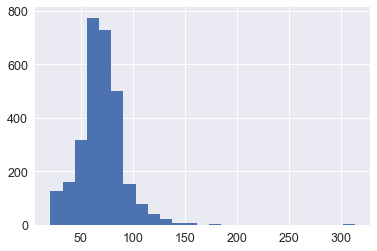

In [130]:
plt.hist(train_test_df["LotFrontage"], bins=25)

In [131]:
skew(train_test_df["LotFrontage"])

1.4819321357895108

In [132]:
train_test_df["LotFrontage"] = np.log1p(train_test_df["LotFrontage"])

(array([ 51.,  53.,   1.,  22.,  48.,  39.,  85., 156., 153., 454., 413.,
        538., 465., 209., 111.,  50.,  42.,  11.,  10.,   4.,   2.,   0.,
          0.,   0.,   2.]),
 array([3.09104245, 3.19737647, 3.3037105 , 3.41004452, 3.51637854,
        3.62271256, 3.72904658, 3.8353806 , 3.94171462, 4.04804865,
        4.15438267, 4.26071669, 4.36705071, 4.47338473, 4.57971875,
        4.68605277, 4.79238679, 4.89872082, 5.00505484, 5.11138886,
        5.21772288, 5.3240569 , 5.43039092, 5.53672494, 5.64305896,
        5.74939299]),
 <a list of 25 Patch objects>)

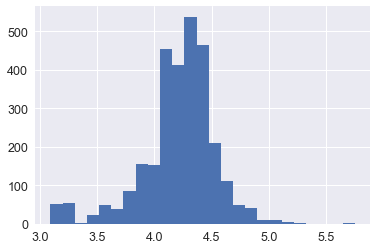

In [133]:
plt.hist(train_test_df["LotFrontage"], bins=25)

In [134]:
skew(train_test_df["LotFrontage"])

-0.9574262105926472

In [135]:
test_df.shape

(1459, 80)

In [144]:
test_normalized_dummies = train_test_df[:test_df.shape[0]]
train_normalized_dummies = train_test_df[test_df.shape[0]:]

In [145]:
test_normalized_dummies

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
0     0.693147     4.394449   9.360741         1   0.000000          1   
1     1.098612     4.406719   9.565775         0   0.000000          1   
2     1.098612     4.317488   9.534668         0   0.000000          1   
3     1.098612     4.369448   9.208238         0   0.000000          1   
4     1.098612     3.784190   8.518392         0   0.000000          1   
5     1.098612     4.330733   9.210440         0   0.000000          1   
6     1.098612     4.328098   8.984819         0   0.000000          1   
7     1.098612     4.158883   9.036344         0   0.000000          1   
8     1.098612     4.454347   9.227886         1   0.000000          1   
9     1.098612     4.262680   9.036106         1   0.000000          1   
10    0.693147     3.295837   8.675734         0   0.000000          1   
11    0.693147     3.091042   7.427144         1   0.000000          1   
12    0.693147     3.091042   7.427144         1   0.000000          1   
13    1.098612     3.218876   7.732369         1   0.000000          1   
14    1.098612     3.218876   7.732369         1   0.000000          1   
15    1.098612     4.634729   9.461799         0   0.000000          1   
16    1.098612     4.553877   9.463742         0   0.000000          1   
17    1.098612     4.510860   9.351927         1   0.000000          1   
18    1.098612     4.382027   9.555560         0   0.000000          1   
19    1.098612     4.709530   9.568085         1   0.000000          0   
20    1.098612     4.663439   9.521568         1   0.000000          1   
21    1.098612     3.737670   8.872487         0   0.000000          1   
22    1.098612     4.615121   9.825256         0   0.000000          1   
23    1.098612     3.784190   8.072155         1   0.000000          1   
24    1.098612     4.219508   9.495594         0   0.000000          1   
25    1.098612     4.158883   9.056956         0   0.000000          1   
26    1.098612     4.110874   9.766178         0   0.693147          1   
27    1.098612     4.304065   9.103646         1   0.000000          1   
28    1.386294     4.532599   9.128696         1   0.000000          1   
29    1.386294     4.442651   9.253496         1   0.000000          1   
...        ...          ...        ...       ...        ...        ...   
1429  0.693147     3.931826   8.858084         1   0.000000          1   
1430  0.693147     4.330733   9.111735         1   0.000000          1   
1431  0.000000     4.248495   9.422787         1   0.000000          1   
1432  0.000000     3.931826   9.105091         1   0.000000          1   
1433  0.000000     4.110874   9.050289         1   0.000000          1   
1434  0.693147     3.737670   8.656781         0   0.000000          0   
1435  0.693147     3.806662   8.254009         0   0.000000          0   
1436  1.098612     4.248495  10.068197         0   0.000000          0   
1437  1.098612     4.189655   9.034319         1   0.000000          1   
1438  1.098612     4.262680   9.117896         1   0.000000          1   
1439  1.098612     4.948760   9.312987         1   0.000000          1   
1440  1.098612     4.335983  10.821836         0   0.000000          0   
1441  1.098612     4.177459   8.999496         0   0.000000          1   
1442  1.098612     4.564348   9.519221         1   0.000000          1   
1443  1.098612     4.488636   9.356862         1   0.000000          1   
1444  1.098612     4.836282  10.349807         1   0.000000          1   
1445  0.693147     4.369448   8.856661         1   0.000000          1   
1446  0.693147     3.737670   7.888335         1   0.000000          1   
1447  1.098612     4.077537   9.227492         0   0.000000          1   
1448  1.098612     4.293195   9.378985         0   0.000000          1   
1449  0.693147     3.091042   7.293698         1   0.000000          1   
1450  0.693147     3.091042   7.303170         1   0.000000          1   
1451  1.09

In [146]:
train_normalized_dummies

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
0     1.098612     4.189655   9.042040         1   0.000000          1   
1     1.098612     4.394449   9.169623         1   0.000000          1   
2     1.098612     4.234107   9.328212         0   0.000000          1   
3     1.098612     4.110874   9.164401         0   0.000000          1   
4     1.098612     4.442651   9.565284         0   0.000000          1   
5     1.098612     4.454347   9.555064         0   0.000000          1   
6     1.098612     4.330733   9.218804         1   0.000000          1   
7     1.098612     4.463607   9.247925         0   0.000000          1   
8     0.693147     3.951244   8.719481         1   0.000000          1   
9     1.098612     3.931826   8.912069         1   0.000000          1   
10    1.098612     4.262680   9.323758         1   0.000000          1   
11    1.098612     4.454347   9.386392         0   0.000000          1   
12    1.098612     4.295924   9.470317         0   0.000000          1   
13    1.098612     4.521789   9.273597         0   0.000000          1   
14    1.098612     4.593098   9.298443         0   0.000000          1   
15    0.693147     3.951244   8.719481         1   0.000000          1   
16    1.098612     4.423648   9.327412         0   0.693147          1   
17    1.098612     4.290459   9.286560         1   0.000000          1   
18    1.098612     4.204693   9.524859         1   0.000000          1   
19    1.098612     4.262680   8.930759         1   0.000000          1   
20    1.098612     4.624973   9.562123         0   0.000000          1   
21    0.693147     4.060443   8.915969         1   0.000000          1   
22    1.098612     4.330733   9.184304         1   0.000000          1   
23    0.693147     3.806662   8.348775         1   0.000000          1   
24    1.098612     4.136765   9.017605         0   0.000000          1   
25    1.098612     4.709530   9.563178         1   0.000000          1   
26    1.098612     4.110874   8.881975         1   0.000000          1   
27    1.098612     4.595120   9.348275         1   0.000000          1   
28    1.098612     3.871201   9.700269         0   0.693147          1   
29    0.693147     4.110874   8.752265         0   0.000000          1   
...        ...          ...        ...       ...        ...        ...   
1430  1.098612     4.110874   9.995656         0   0.000000          1   
1431  1.098612     4.104295   8.502891         0   0.000000          1   
1432  1.098612     4.110874   9.287394         1   0.000000          1   
1433  1.098612     4.543295   9.236203         0   0.000000          1   
1434  1.098612     4.394449   9.764283         1   0.000000          0   
1435  1.098612     4.394449   9.036106         1   0.000000          1   
1436  1.098612     4.110874   9.105091         1   0.000000          1   
1437  1.098612     4.574711   9.429074         1   0.000000          1   
1438  0.693147     4.510860   8.910316         1   0.000000          1   
1439  1.098612     4.394449   9.357466         1   0.000000          1   
1440  1.098612     4.382027   9.352447         0   0.000000          0   
1441  0.693147     3.678829   8.395477         1   0.000000          1   
1442  1.386294     4.454347   9.306014         1   0.000000          1   
1443  1.098612     4.201703   9.088738         1   0.000000          1   
1444  1.098612     4.158883   9.047939         1   0.000000          1   
1445  1.098612     4.262680   9.036106         1   0.000000          1   
1446  1.098612     4.301359  10.171337         0   0.693147          1   
1447  1.098612     4.394449   9.210440         1   0.000000          1   
1448  1.098612     4.262680   9.373139         1   0.000000          1   
1449  0.693147     3.091042   7.335634         1   0.000000          1   
1450  1.098612     4.110874   9.105091         1   0.000000          1   
1451  1.098612     4.369448   9.133783         1   0.000000          1   
1452  0.69

## Transforming SalePrice

C:\Users\Bains\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SalePrice distribution')

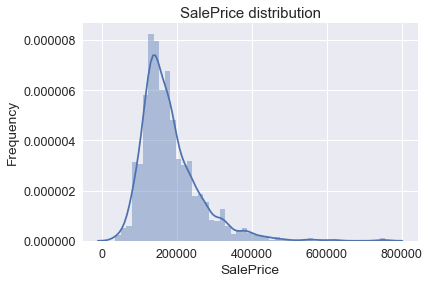

In [147]:
#looking at saleprice distribution and skewness
sns.distplot(train['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519417, 180921.19589041095, 0.9319665641512986))

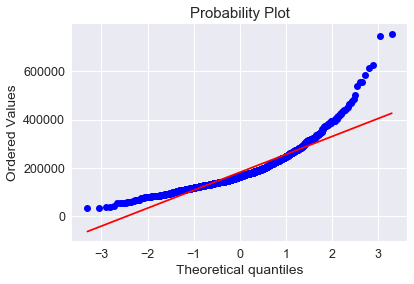

In [148]:
#QQ plot
#res = stats.probplot(train['SalePrice'], plot=plt) # does not show array and numbers
stats.probplot(train['SalePrice'], plot=plt)

In [149]:
np.mean(train.SalePrice)
np.std(train.SalePrice) #sigma

79415.29188606751

In [150]:
train.SalePrice = np.log1p(train.SalePrice)

In [151]:
#need to normalize SalePrice for models
#doing log transformation

np.mean(train.SalePrice)
np.std(train.SalePrice)


0.39931245219387496

C:\Users\Bains\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SalePrice distribution')

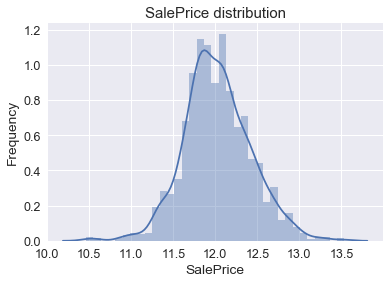

In [152]:
#looking at saleprice distribution and skewness
sns.distplot(train['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.39825964665415087, 12.024057394918403, 0.9953761551826698))

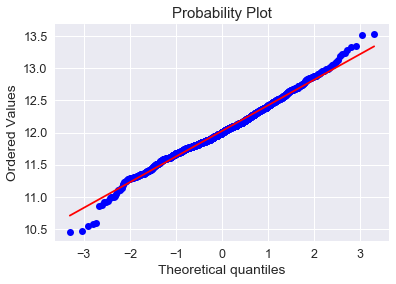

In [153]:
#QQ plot
#res = stats.probplot(train['SalePrice'], plot=plt) # does not show array and numbers
stats.probplot(train['SalePrice'], plot=plt)

In [155]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1430  1431          60       RL         60.0    21930   Pave   NaN      IR3   
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
1432  1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1433  1434          60       RL         93.0    10261   Pave   NaN      IR1   
1434  1435          20       RL         80.0    17400   Pave   NaN      Reg   
1435  1436          20       RL         80.0     8400   Pave   NaN      Reg   
1436  1437          20       RL         60.0     9000   Pave   NaN      Reg   
1437  1438          20       RL         96.0    12444   Pave   NaN      Reg   
1438  1439          20       RM         90.0     7407   Pave   NaN      Reg   
1439  1440          60       RL         80.0    11584   Pave   NaN      Reg   
1440  1441          70       RL         79.0    11526   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1444  1445          20       RL         63.0     8500   Pave   NaN      Reg   
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pa

In [156]:
train_normalized_dummies['SalePrice'] = train['SalePrice']

C:\Users\Bains\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [157]:
train_normalized_dummies

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
0     1.098612     4.189655   9.042040         1   0.000000          1   
1     1.098612     4.394449   9.169623         1   0.000000          1   
2     1.098612     4.234107   9.328212         0   0.000000          1   
3     1.098612     4.110874   9.164401         0   0.000000          1   
4     1.098612     4.442651   9.565284         0   0.000000          1   
5     1.098612     4.454347   9.555064         0   0.000000          1   
6     1.098612     4.330733   9.218804         1   0.000000          1   
7     1.098612     4.463607   9.247925         0   0.000000          1   
8     0.693147     3.951244   8.719481         1   0.000000          1   
9     1.098612     3.931826   8.912069         1   0.000000          1   
10    1.098612     4.262680   9.323758         1   0.000000          1   
11    1.098612     4.454347   9.386392         0   0.000000          1   
12    1.098612     4.295924   9.470317         0   0.000000          1   
13    1.098612     4.521789   9.273597         0   0.000000          1   
14    1.098612     4.593098   9.298443         0   0.000000          1   
15    0.693147     3.951244   8.719481         1   0.000000          1   
16    1.098612     4.423648   9.327412         0   0.693147          1   
17    1.098612     4.290459   9.286560         1   0.000000          1   
18    1.098612     4.204693   9.524859         1   0.000000          1   
19    1.098612     4.262680   8.930759         1   0.000000          1   
20    1.098612     4.624973   9.562123         0   0.000000          1   
21    0.693147     4.060443   8.915969         1   0.000000          1   
22    1.098612     4.330733   9.184304         1   0.000000          1   
23    0.693147     3.806662   8.348775         1   0.000000          1   
24    1.098612     4.136765   9.017605         0   0.000000          1   
25    1.098612     4.709530   9.563178         1   0.000000          1   
26    1.098612     4.110874   8.881975         1   0.000000          1   
27    1.098612     4.595120   9.348275         1   0.000000          1   
28    1.098612     3.871201   9.700269         0   0.693147          1   
29    0.693147     4.110874   8.752265         0   0.000000          1   
...        ...          ...        ...       ...        ...        ...   
1430  1.098612     4.110874   9.995656         0   0.000000          1   
1431  1.098612     4.104295   8.502891         0   0.000000          1   
1432  1.098612     4.110874   9.287394         1   0.000000          1   
1433  1.098612     4.543295   9.236203         0   0.000000          1   
1434  1.098612     4.394449   9.764283         1   0.000000          0   
1435  1.098612     4.394449   9.036106         1   0.000000          1   
1436  1.098612     4.110874   9.105091         1   0.000000          1   
1437  1.098612     4.574711   9.429074         1   0.000000          1   
1438  0.693147     4.510860   8.910316         1   0.000000          1   
1439  1.098612     4.394449   9.357466         1   0.000000          1   
1440  1.098612     4.382027   9.352447         0   0.000000          0   
1441  0.693147     3.678829   8.395477         1   0.000000          1   
1442  1.386294     4.454347   9.306014         1   0.000000          1   
1443  1.098612     4.201703   9.088738         1   0.000000          1   
1444  1.098612     4.158883   9.047939         1   0.000000          1   
1445  1.098612     4.262680   9.036106         1   0.000000          1   
1446  1.098612     4.301359  10.171337         0   0.693147          1   
1447  1.098612     4.394449   9.210440         1   0.000000          1   
1448  1.098612     4.262680   9.373139         1   0.000000          1   
1449  0.693147     3.091042   7.335634         1   0.000000          1   
1450  1.098612     4.110874   9.105091         1   0.000000          1   
1451  1.098612     4.369448   9.133783         1   0.000000          1   
1452  0.69

In [154]:
#rmsle calculation function

def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))


## Lasso model for feature importance

In [158]:
x = train_normalized_dummies.loc[:,train_normalized_dummies.columns !='SalePrice']

In [159]:
y = train_normalized_dummies['SalePrice']

In [160]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
          ...    
1430    12.165985
1431    11.875838
1432    11.074436
1433    12.136192
1434    11.982935
1435    12.066816
1436    11.699413
1437    12.885673
1438    11.916395
1439    12.190964
1440    12.160034
1441    11.913720
1442    12.644331
1443    11.703554
1444    12.098493
1445    11.767575
1446    11.969724
1447    12.388398
1448    11.626263
1449    11.429555
1450    11.820418
1451    12.567555
1452    11.884496
1453    11.344519
1454    12

In [161]:
#train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=0)

### Lasso for feature importance

In [162]:
# lasso model
lasso = linear_model.Lasso()

alpha_100 = np.logspace(-5, 5, 100)
coef_lasso= []
for i in alpha_100:
    lasso.set_params(alpha = i)
    lasso.fit(x, y)
    coef_lasso.append(lasso.coef_)

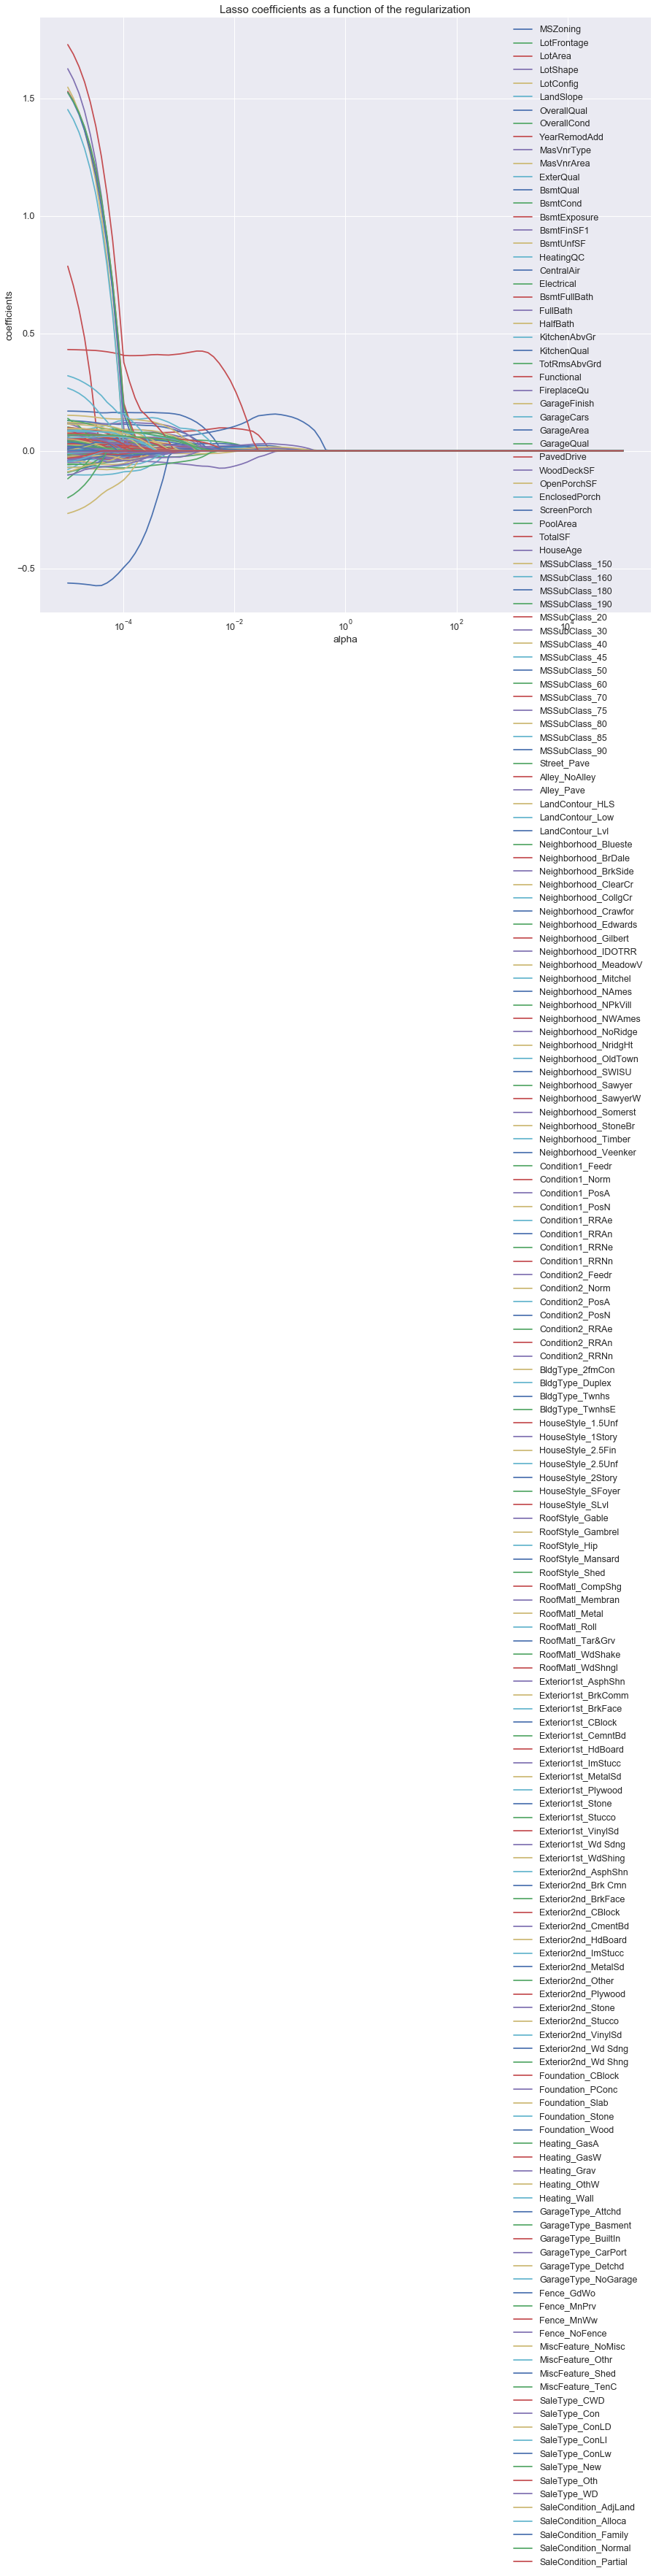

In [164]:
columns = train_normalized_dummies.columns[train_normalized_dummies.columns!='SalePrice']
df_coef = pd.DataFrame(coef_lasso, index=alpha_100, columns=columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title, figsize=(15,15))
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

In [163]:
#gridsearch
Lasso = linear_model.Lasso()

alphas_gs = np.logspace(-5, 2, 100)
grid = GridSearchCV(estimator=Lasso,
param_grid=dict(alpha=alphas_gs), cv=10, scoring='r2')
grid.fit(x,y) # entire datasets were fed here

print (grid.best_params_, grid.best_score_)
for params, mean_score, scores in grid.grid_scores_:
    print (mean_score, params)

{'alpha': 0.0008111308307896872} 0.8993994241286477
0.8572454045957921 {'alpha': 1e-05}
0.8586025639099656 {'alpha': 1.1768119524349992e-05}
0.8599865261350271 {'alpha': 1.3848863713938717e-05}
0.8615514090934491 {'alpha': 1.6297508346206434e-05}
0.8634277789824113 {'alpha': 1.917910261672489e-05}
0.8653871352105893 {'alpha': 2.2570197196339216e-05}
0.8673930394037959 {'alpha': 2.656087782946684e-05}
0.8695185063289229 {'alpha': 3.1257158496882356e-05}
0.87191252803513 {'alpha': 3.678379771828634e-05}
0.8745768448140532 {'alpha': 4.328761281083062e-05}
0.8773922227496335 {'alpha': 5.0941380148163754e-05}
0.8803011232019341 {'alpha': 5.994842503189409e-05}
0.883294939157737 {'alpha': 7.054802310718646e-05}
0.8861448438554732 {'alpha': 8.302175681319735e-05}
0.8886582633284589 {'alpha': 9.770099572992247e-05}
0.8909035673281246 {'alpha': 0.00011497569953977356}
0.8925834414242404 {'alpha': 0.00013530477745798074}
0.8935901042195462 {'alpha': 0.00015922827933410923}
0.8944722519638921 {'a

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [165]:
#finding the alpha at which feature goes to zero in lasso
df_alpha_for_zero_coeff = []

for i in columns:
    alpha_coeffzero = min(df_coef[(df_coef.loc[:,i] == 0)].index)
    df_alpha_for_zero_coeff.append([i, alpha_coeffzero])
    
df_alpha_for_zero_coeff = pd.DataFrame(df_alpha_for_zero_coeff,columns = ['Feature','Alpha_at_zero_coeff'])
df_alpha_for_zero_coeff.sort_values('Alpha_at_zero_coeff')

Feature  Alpha_at_zero_coeff
79     Neighborhood_Sawyer             0.000010
56           Alley_NoAlley             0.000010
113          RoofStyle_Hip             0.000010
98         Condition2_RRAn             0.000010
40          MSSubClass_150             0.000010
51           MSSubClass_75             0.000010
134    Exterior1st_VinylSd             0.000010
161           Heating_Wall             0.000010
100        BldgType_2fmCon             0.000013
49           MSSubClass_60             0.000013
46           MSSubClass_40             0.000016
149    Exterior2nd_VinylSd             0.000016
157           Heating_GasA             0.000020
52           MSSubClass_80             0.000020
91         Condition1_RRNe             0.000020
107      HouseStyle_2.5Unf             0.000020
54           MSSubClass_90             0.000020
123    Exterior1st_AsphShn             0.000025
114      RoofStyle_Mansard             0.000025
147      Exterior2nd_Stone             0.000025
48           MSSubClass_50             0.000025
127    Exterior1st_CemntBd             0.000032
81    Neighborhood_Somerst             0.000032
101        BldgType_Duplex             0.000040
188  SaleCondition_Partial             0.000040
186   SaleCondition_Family             0.000040
180         SaleType_ConLw             0.000040
8             YearRemodAdd             0.000040
47           MSSubClass_45             0.000040
93        Condition2_Feedr             0.000040
..                     ...                  ...
125    Exterior1st_BrkFace             0.002656
25            TotRmsAbvGrd             0.003352
75    Neighborhood_NoRidge             0.003352
105      HouseStyle_1Story             0.003352
67    Neighborhood_Edwards             0.004229
66    Neighborhood_Crawfor             0.004229
21                FullBath             0.004229
187   SaleCondition_Normal             0.004229
29              GarageCars             0.005337
13                BsmtCond             0.005337
86         Condition1_Norm             0.006734
0                 MSZoning             0.006734
153       Foundation_PConc             0.006734
26              Functional             0.008498
22                HalfBath             0.008498
16               BsmtUnfSF             0.013530
14            BsmtExposure             0.017074
7              OverallCond             0.027186
38                 TotalSF             0.027186
36             ScreenPorch             0.027186
28            GarageFinish             0.027186
24             KitchenQual             0.034305
17               HeatingQC             0.054623
2                  LotArea             0.054623
39                HouseAge             0.068926
15              BsmtFinSF1             0.220513
34             OpenPorchSF             0.278256
33              WoodDeckSF             0.278256
27             FireplaceQu             0.351119
6              OverallQual             0.559081

[189 rows x 2 columns]

### Lasso CV

In [166]:
model_lasso = LassoCV(alphas = np.logspace(-5, 5, 100), max_iter=2000) #lassoCV does CV on alpha

In [167]:
model_lasso.fit(x,y)

LassoCV(alphas=array([1.00000e-05, 1.26186e-05, ..., 7.92483e+04, 1.00000e+05]),
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=2000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [168]:
model_lasso.alpha_

0.0006579332246575682

In [169]:
len(model_lasso.coef_)

189

In [180]:
np.mean(cross_val_score(model_lasso,x,y,cv=20)) #score in case of Lasso is R^2 . Cross_val_score does CV on data

0.8930400466353271

In [179]:
cross_val_score(model_lasso,x,y,cv=20)

array([0.90159746, 0.87846211, 0.92487283, 0.93955556, 0.94501788,
       0.92758406, 0.89130149, 0.83434504, 0.90043838, 0.90331462,
       0.92048749, 0.90675932, 0.92234216, 0.88935877, 0.92109905,
       0.93076241, 0.8874335 , 0.64605792, 0.91577412, 0.87423673])

In [171]:
len(x.columns)

189

In [181]:
def rmse_cv(model,x,y):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 20))
    return(rmse)

In [182]:
rmse_cv(model_lasso, x,y).mean()

0.12496942020799869

In [183]:
model_lasso.score(x,y)

0.9141390438670893

In [184]:
coef = pd.Series(model_lasso.coef_, index = x.columns)

In [185]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 72 variables and eliminated the other 117 variables


In [186]:
imp_coef = pd.concat([coef.sort_values().head(15),
                     coef.sort_values().tail(15)])

Text(0.5,1,'Coefficients in the Lasso Model')

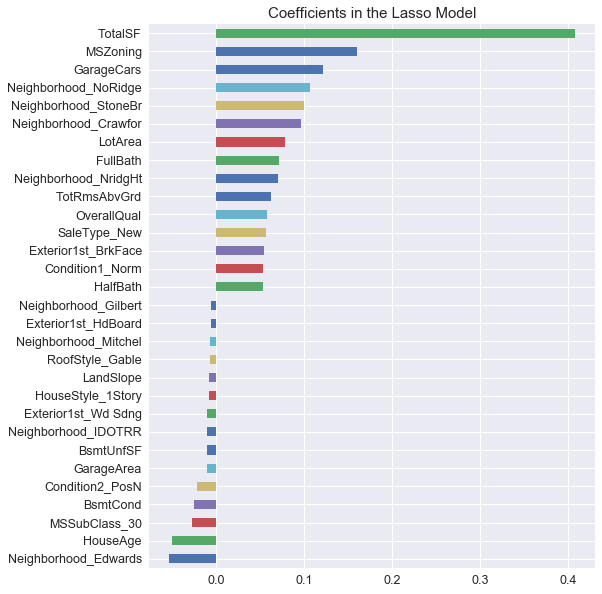

In [187]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [188]:
train_normalized_dummies.dtypes

MSZoning                 float64
LotFrontage              float64
LotArea                  float64
LotShape                   int64
LotConfig                float64
LandSlope                  int64
OverallQual                int64
OverallCond                int64
YearRemodAdd             float64
MasVnrType               float64
MasVnrArea               float64
ExterQual                  int64
BsmtQual                   int64
BsmtCond                   int64
BsmtExposure               int64
BsmtFinSF1               float64
BsmtUnfSF                float64
HeatingQC                  int64
CentralAir                 int64
Electrical                 int64
BsmtFullBath             float64
FullBath                 float64
HalfBath                 float64
KitchenAbvGr             float64
KitchenQual                int64
TotRmsAbvGrd             float64
Functional                 int64
FireplaceQu                int64
GarageFinish               int64
GarageCars               float64
          

In [190]:
#finding variance for each column
import pprint

print('Shape: (%d, %d)' %train_normalized_dummies.shape)
print('Variation:')
pprint.pprint(dict(zip(train_normalized_dummies.columns, np.var(train_normalized_dummies, 0))))

Shape: (1460, 190)
Variation:
{'Alley_NoAlley': 0.05844389191217898,
 'Alley_Pave': 0.027293582285607007,
 'BldgType_2fmCon': 0.020782041658848123,
 'BldgType_Duplex': 0.034347907674986244,
 'BldgType_Twnhs': 0.028584631262900662,
 'BldgType_TwnhsE': 0.07198536310752406,
 'BsmtCond': 0.3046702007881493,
 'BsmtExposure': 1.1369952148620674,
 'BsmtFinSF1': 8.946245347314221,
 'BsmtFullBath': 0.12230321044569975,
 'BsmtQual': 0.7676881215988133,
 'BsmtUnfSF': 3.435036818561661,
 'CentralAir': 0.060834584349783186,
 'Condition1_Feedr': 0.052401482454493456,
 'Condition1_Norm': 0.11822105460686892,
 'Condition1_PosA': 0.005449427659973769,
 'Condition1_PosN': 0.012844342278100737,
 'Condition1_RRAe': 0.007477481703884552,
 'Condition1_RRAn': 0.01749108650778722,
 'Condition1_RRNe': 0.0013679864890223427,
 'Condition1_RRNn': 0.0034129292550197387,
 'Condition2_Feedr': 0.00409270031900911,
 'Condition2_Norm': 0.010168418089697625,
 'Condition2_PosA': 0.000684462375680209,
 'Condition2_PosN': 

In [191]:
#variance threshold function 

#not useful for the features here
select = fs.VarianceThreshold(threshold=0.01)
train_var_sel=select.fit_transform(train_normalized_dummies)

train_var_sel

array([[ 1.09861229,  4.18965474,  9.04204006, ...,  1.        ,
         0.        , 12.24769912],
       [ 1.09861229,  4.39444915,  9.16962254, ...,  1.        ,
         0.        , 12.10901644],
       [ 1.09861229,  4.2341065 ,  9.32821229, ...,  1.        ,
         0.        , 12.31717117],
       ...,
       [ 1.09861229,  4.20469262,  9.10974626, ...,  1.        ,
         0.        , 12.49313327],
       [ 1.09861229,  4.2341065 ,  9.18173511, ...,  1.        ,
         0.        , 11.86446927],
       [ 1.09861229,  4.33073334,  9.20412107, ...,  1.        ,
         0.        , 11.90159023]])


## Tree Model for feature selection

In [220]:
tree_model = tree.DecisionTreeRegressor(max_leaf_nodes=110)

In [221]:
tree_model.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=110, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [222]:
tree_model.score(x,y)

0.9418641690744839

In [227]:
np.mean(cross_val_score(tree_model, x, y, cv=10))

0.7820091560396997

In [205]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(tree_model, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [208]:
import graphviz 
from sklearn.tree import export_graphviz
dot_data = tree.export_graphviz(tree_model, out_file=None)
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

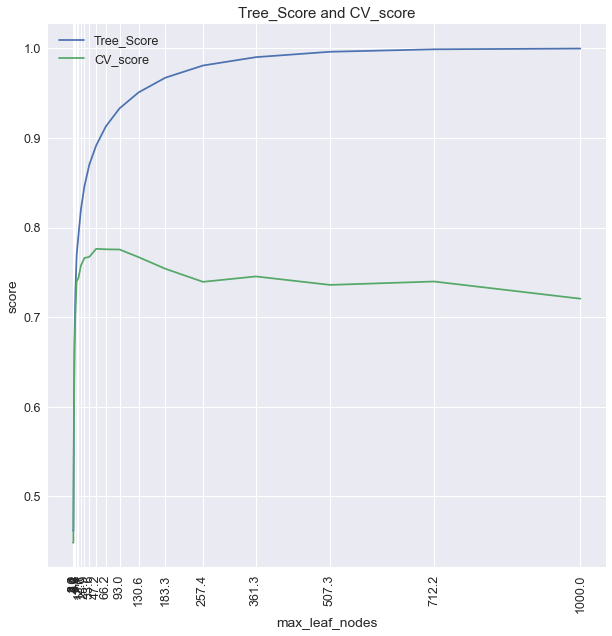

In [210]:
scores = []
domrange = np.logspace(0.2,3,20)
for i in domrange:
    tree_model = tree.DecisionTreeRegressor(max_leaf_nodes = int(round(i)))
    tree_model.fit(x,y)
    scores.append([tree_model.score(x,y),np.mean(cross_val_score(tree_model, x, y, cv=20))])
df_coef = pd.DataFrame(scores, index=domrange, columns=['Tree_Score','CV_score'])
title = 'Tree_Score and CV_score'
df_coef.plot(logx=False, title=title, figsize = (10,10))
plt.xlabel('max_leaf_nodes')
plt.xticks(domrange,rotation=90)
plt.ylabel('score')
plt.show()

In [223]:
#print(tree_model.feature_importances_)

feature_importance = list(zip(X_train.columns, tree_model.feature_importances_))
dtype = [('feature', 'S15'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = pd.DataFrame(np.sort(feature_importance, order='importance')[::-1])
feature_sort

feature  importance
0        b'OverallQual'    0.510200
1            b'TotalSF'    0.292955
2         b'CentralAir'    0.032236
3         b'GarageCars'    0.024455
4         b'BsmtFinSF1'    0.016820
5       b'YearRemodAdd'    0.014352
6        b'OverallCond'    0.012906
7            b'LotArea'    0.011533
8          b'BsmtUnfSF'    0.009971
9    b'GarageType_Detc'    0.009642
10          b'MSZoning'    0.009500
11        b'GarageArea'    0.007497
12          b'BsmtQual'    0.006549
13          b'HouseAge'    0.005532
14       b'FireplaceQu'    0.004834
15       b'LotFrontage'    0.003475
16   b'Neighborhood_Ol'    0.002644
17       b'OpenPorchSF'    0.002401
18     b'EnclosedPorch'    0.002288
19      b'BsmtExposure'    0.001813
20      b'TotRmsAbvGrd'    0.001742
21       b'KitchenQual'    0.001494
22   b'Neighborhood_Nr'    0.001266
23        b'WoodDeckSF'    0.001221
24      b'BsmtFullBath'    0.001181
25   b'LandContour_HLS'    0.000983
26        b'MasVnrType'    0.000941
27   b'BldgType_Duplex'    0.000919
28         b'HeatingQC'    0.000918
29        b'Functional'    0.000823
..                  ...         ...
159  b'Exterior1st_Met'    0.000000
160  b'Exterior1st_ImS'    0.000000
161  b'Exterior1st_HdB'    0.000000
162  b'Exterior1st_Cem'    0.000000
163  b'Exterior1st_CBl'    0.000000
164  b'Exterior1st_Brk'    0.000000
165  b'Exterior1st_Brk'    0.000000
166  b'Exterior1st_Asp'    0.000000
167        b'ExterQual'    0.000000
168       b'Electrical'    0.000000
169  b'Condition2_RRNn'    0.000000
170  b'Condition2_RRAn'    0.000000
171  b'Condition2_RRAe'    0.000000
172  b'Condition2_PosN'    0.000000
173  b'Condition2_PosA'    0.000000
174  b'Condition2_Norm'    0.000000
175  b'Condition2_Feed'    0.000000
176  b'Condition1_RRNn'    0.000000
177  b'Condition1_RRNe'    0.000000
178  b'Condition1_RRAn'    0.000000
179  b'Condition1_PosN'    0.000000
180  b'Condition1_PosA'    0.000000
181  b'Condition1_Norm'    0.000000
182  b'Condition1_Feed'    0.000000
183         b'BsmtCond'    0.000000
184  b'BldgType_TwnhsE'    0.000000
185   b'BldgType_Twnhs'    0.000000
186  b'BldgType_2fmCon'    0.000000
187       b'Alley_Pave'    0.000000
188    b'Alley_NoAlley'    0.000000

[189 rows x 2 columns]

# Random Forest Model for feature selection

In [231]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor(n_estimators=500,max_leaf_nodes=100,oob_score=True)

In [232]:
ensemble.RandomForestRegressor(n_estimators=500,max_leaf_nodes=100,oob_score=True)randomForest.set_params(random_state=42)
randomForest.fit(x,y) # fit 
randomForest.score(x,y) # accuracy

0.9589043511349413

In [233]:
np.mean(cross_val_score(randomForest, x, y, cv=10))

0.872010445128071

In [243]:
rf_feature_imp =[x.columns, randomForest.feature_importances_]
rf_feature_imp= pd.DataFrame(rf_feature_imp)
rf_feature_imp = rf_feature_imp.T
rf_feature_imp.columns = ['Feature','Feature_Imp']
rf_feature_imp.sort_values(by=['Feature_Imp'], ascending=False)

Feature  Feature_Imp
6              OverallQual      0.46801
38                 TotalSF      0.33239
18              CentralAir    0.0201001
29              GarageCars    0.0145699
39                HouseAge    0.0124884
2                  LotArea    0.0114722
15              BsmtFinSF1    0.0113718
8             YearRemodAdd    0.0111201
30              GarageArea    0.0109136
7              OverallCond    0.0108221
0                 MSZoning   0.00795869
16               BsmtUnfSF   0.00730172
24             KitchenQual   0.00554258
1              LotFrontage   0.00550092
27             FireplaceQu   0.00516158
12                BsmtQual    0.0039887
28            GarageFinish   0.00385462
31              GarageQual   0.00371094
34             OpenPorchSF   0.00322221
166      GarageType_Detchd   0.00260525
35           EnclosedPorch   0.00224958
25            TotRmsAbvGrd    0.0021149
21                FullBath   0.00210689
10              MasVnrArea   0.00193589
32              PavedDrive   0.00193092
33              WoodDeckSF   0.00190267
14            BsmtExposure   0.00182563
186   SaleCondition_Family   0.00160786
26              Functional   0.00160065
77    Neighborhood_OldTown   0.00141574
..                     ...          ...
147      Exterior2nd_Stone  2.66662e-06
155       Foundation_Stone  2.48223e-06
118         RoofMatl_Metal  2.37622e-06
143    Exterior2nd_ImStucc  2.13839e-06
92         Condition1_RRNn   2.0376e-06
62     Neighborhood_BrDale  1.55352e-06
170             Fence_MnWw  1.14057e-06
98         Condition2_RRAn   1.0007e-06
91         Condition1_RRNe            0
184  SaleCondition_AdjLand            0
40          MSSubClass_150            0
97         Condition2_RRAe            0
179         SaleType_ConLI            0
175       MiscFeature_TenC            0
95         Condition2_PosA            0
177           SaleType_Con            0
114      RoofStyle_Mansard            0
145      Exterior2nd_Other            0
115         RoofStyle_Shed            0
117       RoofMatl_Membran            0
119          RoofMatl_Roll            0
121       RoofMatl_WdShake            0
123    Exterior1st_AsphShn            0
126     Exterior1st_CBlock            0
129    Exterior1st_ImStucc            0
132      Exterior1st_Stone            0
156        Foundation_Wood            0
61    Neighborhood_Blueste            0
140     Exterior2nd_CBlock            0
137    Exterior2nd_AsphShn            0

[189 rows x 2 columns]

In [244]:
rf_feature_imp.to_csv('Random_Forest_Feature_Imp.csv')

In [245]:
sfm = SelectFromModel(randomForest, threshold=0.005)

# Train the selector
sfm.fit(X_train1, y_train1)

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(X_train1.columns[feature_list_index])

MSZoning
LotFrontage
LotArea
OverallQual
OverallCond
YearRemodAdd
BsmtQual
BsmtFinSF1
BsmtUnfSF
CentralAir
KitchenQual
GarageCars
GarageArea
TotalSF
HouseAge


In [246]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train1)
X_important_test = sfm.transform(X_test1)

In [247]:
# Create a new random forest classifier for the most important features
RF_important = ensemble.RandomForestRegressor(n_estimators=500,max_leaf_nodes=100,oob_score=True)
RF_important.set_params(oob_score=True)
# Train the new classifier on the new dataset containing the most important features
RF_important.fit(X_important_train, y_train1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=100,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [ ]:
dir(ensemble.RandomForestRegressor)

In [ ]:
dir(RF)

In [250]:
randomForest.oob_score_

0.8691149491533302

In [255]:
RF_important.oob_score_

0.8770559011987105

In [252]:
# View The Accuracy Of Our Full Feature Model
randomForest.score(X_test1, y_test1)

0.9551413486314505

In [254]:
RF_important.score(X_important_test, y_test1)

0.8668429859547858

In [253]:
clf_y_out = randomForest.predict(X_test1)

In [258]:
rmsle(np.exp(clf_y_out)-1, np.exp(y_test1)-1)

0.0824106370714018

In [259]:
RF_important_y_out = RF_important.predict(X_important_test)

In [260]:
rmsle(np.exp(RF_important_y_out)-1, np.exp(y_test1)-1)

0.141984909498497

In [257]:
len(y_test1)

292

In [256]:
len(clf_y_out)

292

## Linear Model

In [368]:
lm = linear_model.LinearRegression()
lm.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [369]:
lm.score(X_train1,y_train1)

0.9410812379530247

In [370]:
np.mean(cross_val_score(lm,X_train1,y_train1,cv =10))

0.8409181483909547

In [371]:
lm.score(X_test1,y_test1)

0.8404369568748683

## Ridge Regression

In [264]:
ridge = linear_model.RidgeCV(alphas = np.logspace(-3,3,20)) # create a ridge regression instance
ridge.fit(x, y) # fit data
ridge.coef_, ridge.intercept_ 

(array([ 1.29623232e-01,  3.84482204e-03,  8.27281052e-02,  2.17089779e-03,
         4.60428015e-02, -3.07931459e-02,  5.53889022e-02,  4.30176764e-02,
         1.00194677e-02,  7.12693010e-03,  1.02760982e-04,  4.07291878e-03,
         1.22450027e-02, -2.07611805e-02,  1.30813287e-02,  7.64617325e-03,
        -8.62244575e-03,  1.40820765e-02,  5.23039186e-02, -7.62618708e-03,
         4.04304436e-02,  9.73477338e-02,  6.13969992e-02, -3.81589296e-02,
         2.69812809e-02,  9.98025771e-02,  2.24082487e-02,  1.23373941e-02,
         6.07930777e-03,  1.26222780e-01, -8.75716761e-03,  2.66737356e-02,
         2.10671398e-02,  3.65323475e-03,  2.52710247e-03,  2.59312283e-03,
         8.39109712e-03, -2.19116589e-03,  3.33293109e-01, -3.90140881e-02,
         0.00000000e+00, -2.54679639e-02,  1.57077239e-02, -1.71089660e-02,
         2.01111120e-02, -3.28725556e-02,  2.34866020e-03, -7.28196423e-03,
         6.17657279e-03, -2.23170046e-03,  1.72653806e-02,  3.56017644e-02,
         1.9

In [265]:
ridge.score(x, y)

0.9228939258585844

In [266]:
np.mean(cross_val_score(ridge,x,y,cv =10))

0.8976777396726007

In [267]:
ridge.alpha_

6.158482110660261

In [268]:
alpha_ridge = np.logspace(0, 8, 100)
coef_ridge = []
for i in alpha_ridge:
    ridge.set_params(alphas = i)
    ridge.fit(x, y)
    coef_ridge.append(ridge.coef_)

TypeError: len() of unsized object

In [ ]:
df_coef_ridge = pd.DataFrame(coef_ridge, index=alpha_ridge, columns=x.columns)

title = 'Ridge coefficients as a function of the regularization'
axes = df_coef_ridge.plot(logx=True, title=title, figsize=(15,15))
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')
plt.show()

In [ ]:
x

## Elastic Net CV

In [385]:
elastic_cv = linear_model.ElasticNetCV(l1_ratio= np.linspace(0.0001,1,20),alphas = np.logspace(-5,10,50), cv=10, max_iter=2000)
elastic_cv.fit(X_train1, y_train1)

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

ElasticNetCV(alphas=array([1.00000e-05, 2.02359e-05, 4.09492e-05, 8.28643e-05, 1.67683e-04,
       3.39322e-04, 6.86649e-04, 1.38950e-03, 2.81177e-03, 5.68987e-03,
       1.15140e-02, 2.32995e-02, 4.71487e-02, 9.54095e-02, 1.93070e-01,
       3.90694e-01, 7.90604e-01, 1.59986e+00, 3.23746e+00, 6.55129e+00,
     ..., 1.45635e+08, 2.94705e+08,
       5.96362e+08, 1.20679e+09, 2.44205e+09, 4.94171e+09, 1.00000e+10]),
       copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=array([1.00000e-04, 5.27263e-02, 1.05353e-01, 1.57979e-01, 2.10605e-01,
       2.63232e-01, 3.15858e-01, 3.68484e-01, 4.21111e-01, 4.73737e-01,
       5.26363e-01, 5.78989e-01, 6.31616e-01, 6.84242e-01, 7.36868e-01,
       7.89495e-01, 8.42121e-01, 8.94747e-01, 9.47374e-01, 1.00000e+00]),
       max_iter=2000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [386]:
elastic_cv.score(X_train1, y_train1)

0.9219148407611422

In [387]:
np.mean(cross_val_score(elastic_cv, X_train1, y_train1,cv=10))

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Bains\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

0.8918951123105391

In [388]:
elastic_cv.alpha_

0.002811768697974231

In [389]:
elastic_cv.l1_ratio_

0.10535263157894738

In [395]:
y_elastic_cv = elastic_cv.predict(X_test1)
metrics.r2_score(y_test1, y_elastic_cv)

0.8986113416531527

## PCA

In [269]:
pca_model = pca(n_components=None)
pca_model.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [281]:
x.shape

(1460, 189)

In [272]:
len(pca_model.explained_variance_ratio_)

189

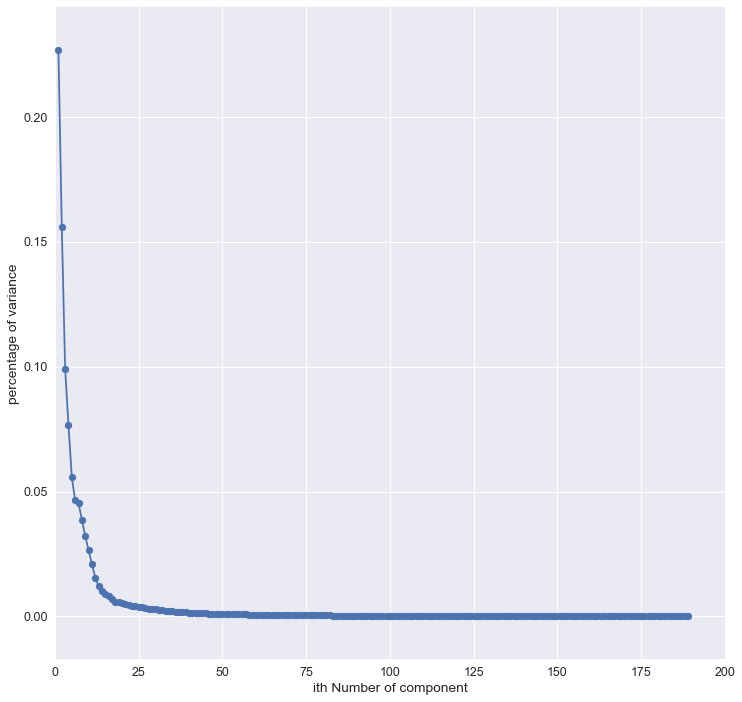

In [273]:
plt.figure(figsize=(12,12))
plt.scatter(range(1, 190), (pca_model.explained_variance_ratio_))
plt.plot(range(1, 190), (pca_model.explained_variance_ratio_))
plt.xlabel('ith Number of component')
plt.ylabel('percentage of variance')
plt.xlim(0, 200)
plt.show()

ValueError: x and y must be the same size

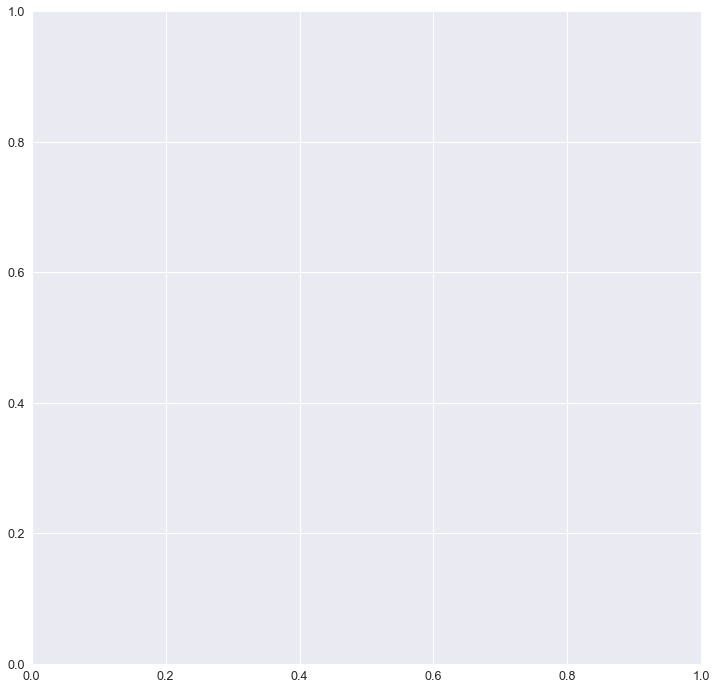

In [275]:
plt.figure(figsize=(12,12))
plt.scatter(range(1, 190), np.sum(pca_model.explained_variance_ratio_))
plt.plot(range(1, 190), np.sum(pca_model.explained_variance_ratio_))
plt.xlabel('Number of component')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 200)
plt.show()

In [276]:
pca_model.components_[0]

array([ 1.69755876e-02,  1.97414643e-02,  3.14464084e-02, -3.41949925e-02,
        5.80416153e-03, -1.04863691e-03,  2.62609357e-01, -4.89296344e-02,
        1.40915947e-03,  7.41412429e-02,  4.98461765e-01,  9.59650080e-02,
        1.53221435e-01,  4.75188114e-02,  1.25779523e-01,  3.61302684e-01,
        6.71831314e-02,  1.07595833e-01,  2.36462602e-02,  5.83235063e-02,
        3.40767374e-02,  2.67354146e-02,  2.44534786e-02, -5.15922040e-03,
        1.05543551e-01,  1.87967059e-02,  2.40261125e-02,  2.48050404e-01,
        1.54087972e-01,  5.25331969e-02,  1.81061488e-01,  7.56588844e-02,
        2.64843534e-02,  3.83551962e-01,  2.95548029e-01, -1.71447648e-01,
        2.12413930e-02,  6.36908895e-03,  5.46530414e-02, -1.85831172e-01,
       -0.00000000e+00, -5.69713893e-04, -9.00951139e-04, -4.83046914e-03,
        1.32218041e-02, -1.56492242e-02, -4.77580614e-04, -3.24253684e-03,
       -2.21521682e-02,  3.85160471e-02, -9.99486592e-03, -2.02900082e-03,
        3.21310035e-03, -

In [282]:
len(x.columns)

189

In [283]:
pd.DataFrame(pca_model.components_, index = x.columns.values).T

MSZoning  LotFrontage   LotArea  LotShape  LotConfig  LandSlope  \
0    0.016976     0.000814 -0.002010 -0.011959   0.004946   0.014340   
1    0.019741     0.004643 -0.008100 -0.012723  -0.030686   0.009369   
2    0.031446     0.001270  0.008567 -0.026224  -0.055914   0.034150   
3   -0.034195    -0.004001 -0.014170  0.019680   0.015357  -0.020795   
4    0.005804    -0.001315  0.002877 -0.002517  -0.000300   0.006379   
5   -0.001049     0.009087 -0.009302  0.002070   0.005318  -0.007673   
6    0.262609     0.151208 -0.054462 -0.122205  -0.125867   0.034739   
7   -0.048930    -0.048847  0.037890 -0.025477  -0.106739  -0.023369   
8    0.001409     0.000930  0.000233 -0.000974   0.000608  -0.000138   
9    0.074141     0.011466 -0.063419  0.085107   0.018752  -0.016281   
10   0.498462     0.039500 -0.481320  0.661225   0.110686  -0.110943   
11   0.095965     0.059679 -0.015238 -0.048709  -0.006422   0.002499   
12   0.153221     0.047991 -0.000909 -0.103058  -0.051595  -0.105371   
13   0.047519    -0.004411 -0.000830 -0.053265  -0.073419  -0.106356   
14   0.125780    -0.041325  0.080589 -0.012634  -0.024061  -0.028796   
15   0.361303    -0.850080 -0.008004 -0.231573  -0.091906  -0.200338   
16   0.067183     0.314448 -0.136244 -0.142238  -0.393233  -0.536063   
17   0.107596     0.086860  0.001958 -0.097624   0.010056  -0.035468   
18   0.023646    -0.001843  0.001728 -0.007883  -0.012712   0.012228   
19   0.058324     0.000724  0.012860 -0.028036   0.001427   0.017487   
20   0.034077    -0.056251  0.013488 -0.020204   0.003974  -0.006729   
21   0.026735     0.025523 -0.004196 -0.011968   0.004484   0.004242   
22   0.024453     0.018202 -0.006249 -0.019018   0.003404   0.016076   
23  -0.005159     0.000454 -0.000614  0.005594   0.005792   0.001803   
24   0.105544     0.055073 -0.002122 -0.062300  -0.021980   0.008273   
25   0.018797     0.020691 -0.006161 -0.005083  -0.018566   0.004379   
26   0.024026     0.003149 -0.003040 -0.008947  -0.003535  -0.015912   
27   0.248050     0.123391 -0.014654 -0.114095  -0.531876   0.357701   
28   0.154088     0.053153 -0.004133 -0.065925  -0.042652   0.120769   
29   0.052533     0.020735 -0.010199 -0.017404  -0.029742   0.059317   
..        ...          ...       ...       ...        ...        ...   
159 -0.002278     0.000739 -0.000587  0.000610   0.001245  -0.002354   
160 -0.000369    -0.000278 -0.000231 -0.000403  -0.000669  -0.001465   
161 -0.001305     0.000016  0.000154  0.002394   0.002596   0.004070   
162  0.065841    -0.003010 -0.001548 -0.017968  -0.014067   0.026262   
163 -0.000225    -0.001756 -0.001656  0.000485  -0.001820   0.003019   
164  0.010948     0.017092  0.003114 -0.000353  -0.001893   0.010296   
165 -0.001176    -0.001160  0.001048  0.000999   0.003350   0.003454   
166 -0.053727    -0.007667 -0.004309  0.005105  -0.021148   0.007763   
167 -0.021417    -0.003200  0.004573  0.010801   0.035859  -0.050793   
168 -0.003192    -0.007137  0.000417  0.006172   0.000069  -0.001125   
169 -0.011197    -0.011263  0.007209  0.006856  -0.004847  -0.003734   
170 -0.000247    -0.002135  0.001244  0.000160   0.001437  -0.000787   
171  0.014762     0.021150 -0.011373 -0.013288   0.006969   0.002809   
172  0.003318     0.003055 -0.003568 -0.000459   0.001757   0.000498   
173 -0.000515    -0.000162 -0.000080  0.000058   0.000821   0.000740   
174 -0.002854    -0.002445  0.003929  0.000845  -0.001775  -0.001174   
175  0.000159    -0.000142 -0.000509 -0.000152  -0.000094   0.000592   
176  0.000286    -0.000491  0.000594  0.000155  -0.000345   0.000632   
177  0.000226     0.000045  0.000687 -0.000750   0.000217   0.000006   
178 -0.000927     0.000268 -0.001065  0.001486   0.000974  -0.000267   
179  0.000005     0.000139 -0.000249 -0.000068   0.000674  -0.000767   
180 -0.000377    -0.000021  0.000686  0.000223   0.000181   0.000328   
181  0.019529     0.024156 -0.010225 -0.012122   0.006872   0.003820   
182 -0.000563    -0.000369  0.000444  0.00016

## Support Vector Regression

In [437]:
#svr rbf kernel
svr_rbf = sklearn.svm.SVR(kernel = 'rbf',C=1e3, epsilon=0.1, gamma = 0.00002)
y_rbf=svr_rbf.fit(X_train1, y_train1) 
#SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
#    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
#sklearn.svm.SVR(kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)

In [285]:
dir(svr_rbf)

['C',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_impl',
 '_intercept_',
 '_pairwise',
 '_sparse',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_validate_for_predict',
 '_validate_targets',
 '_warn_from_fit_status',
 'cache_size',
 'class_weight',
 'class_weight_',
 'coef0',
 'coef_',
 'degre

In [286]:
y_test1

529     12.209193
491     11.798112
459     11.608245
279     12.165256
655     11.385103
1013    11.350418
1403    12.552930
601     11.856522
1182    13.521141
687     11.910365
1317    12.249616
1003    11.827050
1300    12.323860
1392    11.719948
1014    11.688566
254     11.884496
1322    12.154785
89      11.724814
31      11.914055
482     11.951187
142     12.019749
811     11.881042
52      11.608245
857     12.066816
1159    12.128117
991     12.031725
1358    12.086732
649     11.344519
724     12.676079
575     11.682677
          ...    
579     11.786770
520     11.573559
825     12.861001
644     12.823631
642     12.751303
29      11.134604
907     12.429220
1166    12.410445
1192    11.736077
519     12.363081
361     11.884496
124     12.106258
198     11.552156
787     12.358798
1211    12.007628
1075    12.299112
1237    12.180760
557     11.589896
303     11.917730
1359    12.660331
1301    12.086732
1427    11.849405
1402    12.174995
1223    11.834291
1029    11

In [438]:
y_rbf.score(X_train1, y_train1)

0.9190425524124237

In [439]:
np.mean(cross_val_score(svr_rbf, X_train1, y_train1, cv=10))

0.8992044578908427

In [443]:
np.mean(cross_val_score(svr_rbf,x,y, cv=10))

0.8992030778056763

In [440]:
y_rbf.predict(X_test1)

array([12.28235277, 12.19076372, 11.65413403, 11.3487199 , 11.80444449,
       12.71249901, 12.60682591, 11.92617831, 12.31903575, 12.41068432,
       12.14644863, 10.85457681, 12.19081783, 12.67559801, 12.3052754 ,
       11.63640351, 11.61456904, 11.62678334, 12.26068794, 11.80866767,
       11.67151292, 11.82702534, 12.40010202, 12.84968854, 11.4398844 ,
       12.22567542, 11.85351876, 12.10462247, 12.97609667, 11.65571638,
       11.81565627, 11.6981329 , 11.71569521, 11.33070344, 11.89327342,
       12.78158658, 11.82452032, 11.35021736, 12.45767139, 11.49196703,
       11.74779452, 11.88639452, 11.41066211, 11.75125388, 11.99273078,
       12.06957068, 11.68344959, 12.13361619, 12.37514641, 12.51147548,
       11.47367116, 12.6161653 , 11.56455385, 12.3928765 , 12.17458551,
       11.47058531, 11.68770399, 12.03595838, 11.58982892, 12.05136241,
       12.00687456, 12.50453003, 11.26433362, 11.76420535, 12.00427712,
       11.80805764, 11.78262314, 12.54403623, 11.99710625, 11.90

In [444]:
y_rbf.score(X_test1, y_test1)

0.904563634686715

## XG Boost

In [290]:
xgb = XGBRegressor(reg_alpha=0, reg_gamma=1, reg_lambda=1.5)
xgb.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_gamma=1, reg_lambda=1.5, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [291]:
xgb.score(x,y)

0.9515343713721561

In [292]:
np.mean(cross_val_score(xgb, x, y, cv=10))

0.8967921088386603

In [ ]:
#IsolationForest Model
# isolation_model = sklearn.ensemble.IsolationForest(n_estimators=100, contamination=0.1, max_features=1.0, bootstrap=True, n_jobs=1, random_state=None, verbose=0)
# isolation_model.fit(X_train1)
# y_pred_train = isolation_model.predict(X_train1)
# # y_pred_test = isolation_model.predict(X_test1)
# isolation_modely_pred_train

## Ensemling

In [293]:
#train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=1)

In [425]:
llm_out_t = LassoCV(alphas=np.logspace(-5,5,100), max_iter=2000)
llm_out_t.fit(X_train1,y_train1)

xgb_out_t = XGBRegressor(reg_alpha=0, reg_gamma=1, reg_lambda=1.5)
xgb_out_t.fit(X_train1,y_train1)

RF_out_t = ensemble.RandomForestRegressor(n_estimators=500,max_leaf_nodes=100,oob_score=True)
RF_out_t.fit(X_train1,y_train1)

# linear_out_t = linear_model.LinearRegression(normalize=False)
# linear_out_t.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [323]:
y_llm_out_pred = llm_out_t.predict(X_test1)
y_xgb_out_pred = xgb_out_t.predict(X_test1)
y_RF_out_pred = RF_out_t.predict(X_test1)

In [299]:
metrics.r2_score(y_test1,y_llm_out_pred)

0.9051393107543967

In [300]:
metrics.r2_score(y_test1,y_xgb_out_pred)

0.8948392316298629

In [313]:
metrics.r2_score(y_test1,y_RF_out_pred)

0.8837220678321689

In [398]:
metrics.r2_score(y_test1, y_elastic_cv)

0.8986113416531527

In [405]:
y_llm_out_pred_test = llm_out_t.predict(test_normalized_dummies)
y_xgb_out_pred_test = xgb_out_t.predict(test_normalized_dummies)
y_RF_out_pred_test = RF_out_t.predict(test_normalized_dummies)
y_elastic_cv_pred_test = elastic_cv.predict(test_normalized_dummies)

In [415]:
y_out_pred_test = y_llm_out_pred_test*2/3 + y_xgb_out_pred_test/3
metrics.r2_score(y_test1,y_out_pred)

0.908305277992487

In [416]:
rmsle(np.exp(y_out_pred)-1, np.exp(y_test1)-1)

0.12615041506124594

In [409]:
y_out_pred_test = np.exp(y_out_pred_test)-1
y_out_pred_test

array([116009.73989032, 165978.94362666, 183471.5317853 , ...,
       177325.21434196, 120206.78051841, 233485.07984328])

In [361]:
gk_submission = pd.DataFrame(list(y_out_pred_test))

In [362]:
gk_submission.columns = ['SalePrice']
gk_submission['Id'] = test_df['Id']
gk_submission

SalePrice    Id
0     116009.739890  1461
1     165978.943627  1462
2     183471.531785  1463
3     197478.713826  1464
4     203904.914695  1465
5     168508.327872  1466
6     178525.705494  1467
7     162485.254361  1468
8     189908.162744  1469
9     122324.876972  1470
10    195186.992825  1471
11     94415.678822  1472
12     96061.869972  1473
13    152579.535963  1474
14    118559.666692  1475
15    365898.333666  1476
16    254223.354411  1477
17    283676.654239  1478
18    288881.226972  1479
19    437201.648219  1480
20    333014.523498  1481
21    225306.379759  1482
22    183898.031958  1483
23    174219.930483  1484
24    191242.947871  1485
25    204086.838483  1486
26    331032.937591  1487
27    230421.078440  1488
28    200577.314926  1489
29    225004.820766  1490
...             ...   ...
1429   80933.251519  2890
1430  133048.159219  2891
1431   48569.926357  2892
1432   85966.202655  2893
1433   60175.543867  2894
1434  299078.542702  2895
1435  269821.241168  2896
1436  206124.258009  2897
1437  163452.566377  2898
1438  214854.303566  2899
1439  159028.270312  2900
1440  200818.682782  2901
1441  185523.282441  2902
1442  302745.896975  2903
1443  333036.262874  2904
1444   74170.133318  2905
1445  200545.307129  2906
1446  104070.204775  2907
1447  131491.681277  2908
1448  156823.383412  2909
1449   76013.893447  2910
1450   83517.626801  2911
1451  147518.084358  2912
1452   85501.981956  2913
1453   76724.812733  2914
1454   83883.542253  2915
1455   86560.205117  2916
1456  177325.214342  2917
1457  120206.780518  2918
1458  233485.079843  2919

[1459 rows x 2 columns]

In [363]:
gk_submission.to_csv('gk_submission.csv')

In [410]:
#averaging out
y_out_pred = (y_llm_out_pred + y_xgb_out_pred)/2
metrics.r2_score(y_test1,y_out_pred)

0.908305277992487

In [298]:
rmsle(np.exp(y_out_pred)-1, np.exp(y_test1)-1)

0.12615041506124594

In [304]:
#trying 2/3rd xgboost and 1/3rd lassoCV
y_out_pred1 = y_llm_out_pred/3 + y_xgb_out_pred*2/3
metrics.r2_score(y_test1,y_out_pred1)

0.9056645911137626

In [310]:
rmsle(np.exp(y_out_pred1)-1, np.exp(y_test1)-1)

0.1279540046428126

In [306]:
y_out_pred2 = y_llm_out_pred*2/3 + y_xgb_out_pred/3
metrics.r2_score(y_test1,y_out_pred2)

0.9090979535620345

In [311]:
rmsle(np.exp(y_out_pred2)-1, np.exp(y_test1)-1)

0.1256039637534971

In [307]:
y_out_pred3 = y_llm_out_pred*3/4 + y_xgb_out_pred/4
metrics.r2_score(y_test1,y_out_pred3)

0.908801296073531

In [312]:
rmsle(np.exp(y_out_pred3)-1, np.exp(y_test1)-1)

0.12580875015229143

In [367]:
# Best one so far


y_out_pred_3models = y_llm_out_pred/2 + y_xgb_out_pred/4 + y_RF_out_pred/4
metrics.r2_score(y_test1,y_out_pred_3models)

0.9095955591274316

In [366]:
rmsle(np.exp(y_out_pred_3models)-1, np.exp(y_test1)-1)

0.12491034411881366

In [400]:
y_elastic_cv_pred_test.shape

(1459,)

In [421]:
y_out_pred_3models1 = y_xgb_out_pred/3 + y_RF_out_pred/3 + y_elastic_cv/3
metrics.r2_score(y_test1,y_out_pred_3models1)

0.9063354666149012

## Stacking CV Regression

In [433]:
# svr_lin = sklearn.svm.SVR(kernel='linear')
# ridge = RidgeCV()
# lasso = LassoCV()
# svr_rbf = sklearn.svm.SVR(kernel='rbf')
# regressors = [svr_lin, ridge, lasso]
# stregr = StackingCVRegressor(regressors=regressors, 
#                            meta_regressor=svr_rbf)

# params = {'lasso__alpha': [0.1, 1.0, 10.0],
#           'ridge__alpha': [0.1, 1.0, 10.0],
#           'svr__C': [0.1, 1.0, 10.0],
#           'meta-svr__C': [0.1, 1.0, 10.0, 100.0],
#           'meta-svr__gamma': [0.1, 1.0, 10.0]}

# grid = GridSearchCV(estimator=stregr, 
#                     param_grid=params, 
#                     cv=5)
# grid.fit(np.array(x),np.array(y))

# for params, mean_score, scores in grid.grid_scores_:
#         print("%0.3f +/- %0.2f %r"
#               % (mean_score, scores.std() / 2.0, params))